##**Uvod**

U sve konkurentnijoj kozmetičkoj industriji, razumijevanje sastava proizvoda postaje ključno kako za proizvođače, tako i za krajnje korisnike. Potrošači su sve svjesniji sastojaka u proizvodima koje koriste, dok brendovi teže učinkovitijem formuliranju. Stoga je analiza međusobnih odnosa između sastojaka važna za prepoznavanje obrazaca, otkrivanje funkcionalnih grupa i optimizaciju formulacija.

Podaci korišteni u ovom projektu prikupljeni su sa službene stranice Sephora, jednog od vodećih globalnih online trgovaca kozmetikom, i javno su objavljeni na platformi Kaggle.

Korištenje metoda analize mreža (npr. centralnost, detekcija zajednica) i algoritama poput Louvain algoritma omogućuje otkrivanje skrivenih veza i grupiranja sastojaka koja nisu vidljiva u standardnim tabličnim prikazima. Time se stvara dublje razumijevanje funkcionalnih odnosa među sastojcima, kao i identifikacija ključnih komponenti unutar mreže proizvoda.

## Podaci

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dominoweir/skincare-product-ingredients")

print("Path to dataset files:", path)

100%|██████████| 264k/264k [00:00<00:00, 14.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dominoweir/skincare-product-ingredients/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Assuming the dataset is in CSV format, load it into a pandas DataFrame
dataset_file = path + "/cosmetic_p.csv"  # Replace "filename.csv" with the actual file name
df = pd.read_csv(dataset_file)

# Display the DataFrame
df.head()

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [4]:
df.shape

(1472, 11)

In [5]:
df['ingredients']

,ingredients
0,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,"Water, Snail Secretion Filtrate, Phenyl Trimet..."
...,...
1467,"Water, Alcohol Denat., Potassium Cetyl Phospha..."
1468,"Water, Isododecane, Dimethicone, Butyloctyl Sa..."
1469,"Water, Dihydroxyacetone, Glycerin, Sclerocarya..."
1470,"Water, Dihydroxyacetone, Propylene Glycol, PPG..."


Očišćeni podaci- skup dobicen čišćenjem dataframe u drugoj bilježnici

In [7]:
with open('Ingredients_set_769.txt', 'r', encoding='utf-8') as f:
    tekst = f.read()

ingredients = eval(tekst)
print(ingredients)


['Sorbitan Sesquiisostearate', 'Albiza Julibrissin Bark Extract', 'Propylene Carbonate', 'Rhus Succedanea Fruit Wax', 'Cladosiphon Okamuranus Extract', 'Cetyl Esters', 'Garcinia Mangostana Peel Extract', 'Polyglyceryl-5 Laurate', 'Boron nitride', 'Thermus Thermophillus Ferment', 'Ledebouriella Seseloides Root Extract', 'Citrus Aurantium Amara (Bitter Orange) Flower Oil', 'Red Clover Extract', 'Hydrolyzed Soy Protein', 'Cinnamomum Camphora (Camphor) Leaf Extract', 'Tsuga Canadensis Oil', 'Gellidiella Acerosa Extract', 'Lithospermum Erythrorhizon Root Extract', 'Dioscorea Villosa (Wild Yam) Root Extract', 'Oleth-3 Phosphate', 'Plantago Lanceolata Leaf Extract', 'Acetylarginyltryptophyl Diphenylglycine', 'Saponaria Officinalis Leaf Extract', 'Palmitic Acid', 'Disodium Lauriminodipropionate Tocopheryl Phosphates', 'sh-Polypeptide-8', 'Citrus Aurantifolia (Lime) Fruit Extract', 'Citrus Aurantifolia (Lime) Oil', 'Butyrospermum Parkii Nut Shell Powder', 'Carya Ovata Bark Extract', 'Ceteareth-

In [8]:
len(ingredients)

769

In [9]:
# prompt: pretovri listu ingredients u set

ingredients_set = set(ingredients)
print(ingredients_set)
len(ingredients_set)
ingredients_set



{'Tetrahexyldecyl Ascorbate', 'Polyglyceryl-6 Ximenia Americana Seedate', 'Ceramide NP', 'C12-15 Alkyl Lactate', 'Disodium Cocoamphodiacetate', 'PEG-6', 'poloxamer', 'Syringa Vulgaris (Lilac) Leaf Cell Culture Extract', 'Ammonium Glycyrrhizate', 'Phe-noxyethanol', 'Buteth-3', 'Polybutylene Glycol/Ppg-9/1 Copolymer', 'Cinnamomum Camphora (Camphor) Bark Oil', 'Camellia Sinensis Seed Oil', 'Paeonia Albiflora (Peony) Root Extract', 'Ulva Lactuca Extract', 'Chromium Hydroxide Green', 'Rosa Damascena Flower Extract', 'Cryptomeria Japonica Leaf Extract', 'Saccharomyces/Viscum Album (Mistletoe) Ferment Extract', 'Cholesteryl Oleyl Carbonate', 'Chlorphenesin', 'Capryloyl Glycine', 'Bifida Ferment Lysate', 'Eucalyptus Globululs Leaf Oil', 'PEG-240/HDI Copolymer Bis-Decyltetradecet-20 Ether', 'Calcium Stearate', 'Tetrasodium Tetracarboxymethyl Naringeninchalcone', 'Sodium Glycyrrhetinate', 'Acrylates/Vinyl Isodecanoate Crosspolymer', 'Salicornia Herbacea Extract', 'Pentaerythrityl Tetraethylhexan

{'1,2-Hexanediol',
 '3-O-Ethyl Ascorbic Acid',
 '6-Naphthalate',
 'Acacia Farnesiana Flower Wax',
 'Acacia Victoriae Fruit Extract',
 'Acetyl Hexapeptide-8',
 'Acetylarginyltryptophyl Diphenylglycine',
 'Achillea Millefolium Flower Extract',
 'Acrylates /C10-30 Alkyl Acrylate Crosspolymer',
 'Acrylates C10/30 Alkyl Acrylate Crosspolymer',
 'Acrylates/C10-30 Alykyl Acrylate Crosspolymer',
 'Acrylates/Vinyl Isodecanoate Crosspolymer',
 'Aesculus Hippocastanum (Horse Chestnut) Extract',
 'Agarum Cribosum Extract',
 'Agave Tequilana Leaf Extract',
 'Albiza Julibrissin Bark Extract',
 'Alchol Denat',
 'Alcohol',
 'Alcohol Denat',
 'Alcohol denat',
 'Aleurites Moluccana (Kukui) Nut Oil',
 'Algae Extract',
 'Algin',
 'Alkanna Tinctoria Root Extract',
 'Allantoin',
 'Aloe Barbadensis Leaf Extract',
 'Aloe Barbadensis Leaf Juice',
 'Aloe Yohjyu Matsu Ekisu',
 'Alpha Isomethyl Ionone',
 'Alpha Lipoic Acid',
 'Aluminum Hydroxide',
 'Amber Powder',
 'Ammonium Acryloyldimethyltaurate/Vp Copolymer',

## Graf sastojaka

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

#  imate dataframe 'df' i set sastojaka 'ingredients_set'

# Kreirajte graf
graph = nx.Graph()

# Dodaj čvorove za svaki proizvod
products = df['Label'].unique()
graph.add_nodes_from(products, type='product')

# Doda čvorove za svaki sastojak
graph.add_nodes_from(ingredients_set, type='ingredient')

# Povežite proizvode sa sastojcima
for index, row in df.iterrows():
    product_name = row['Label']
    #  sastojci u stupcu 'ingredients' odvojeni zarezom i razmakom
    ingredients = row['ingredients'].split(', ')
    for ingredient in ingredients:
        # Provjera nalazi li se sastojak u pročišćenom setu sastojaka
        if ingredient in ingredients_set:
            graph.add_edge(product_name, ingredient)

# Ispis broja čvorova i bridova
print(f"Broj čvorova: {graph.number_of_nodes()}")
print(f"Broj bridova: {graph.number_of_edges()}")

Broj čvorova: 720
Broj bridova: 1707


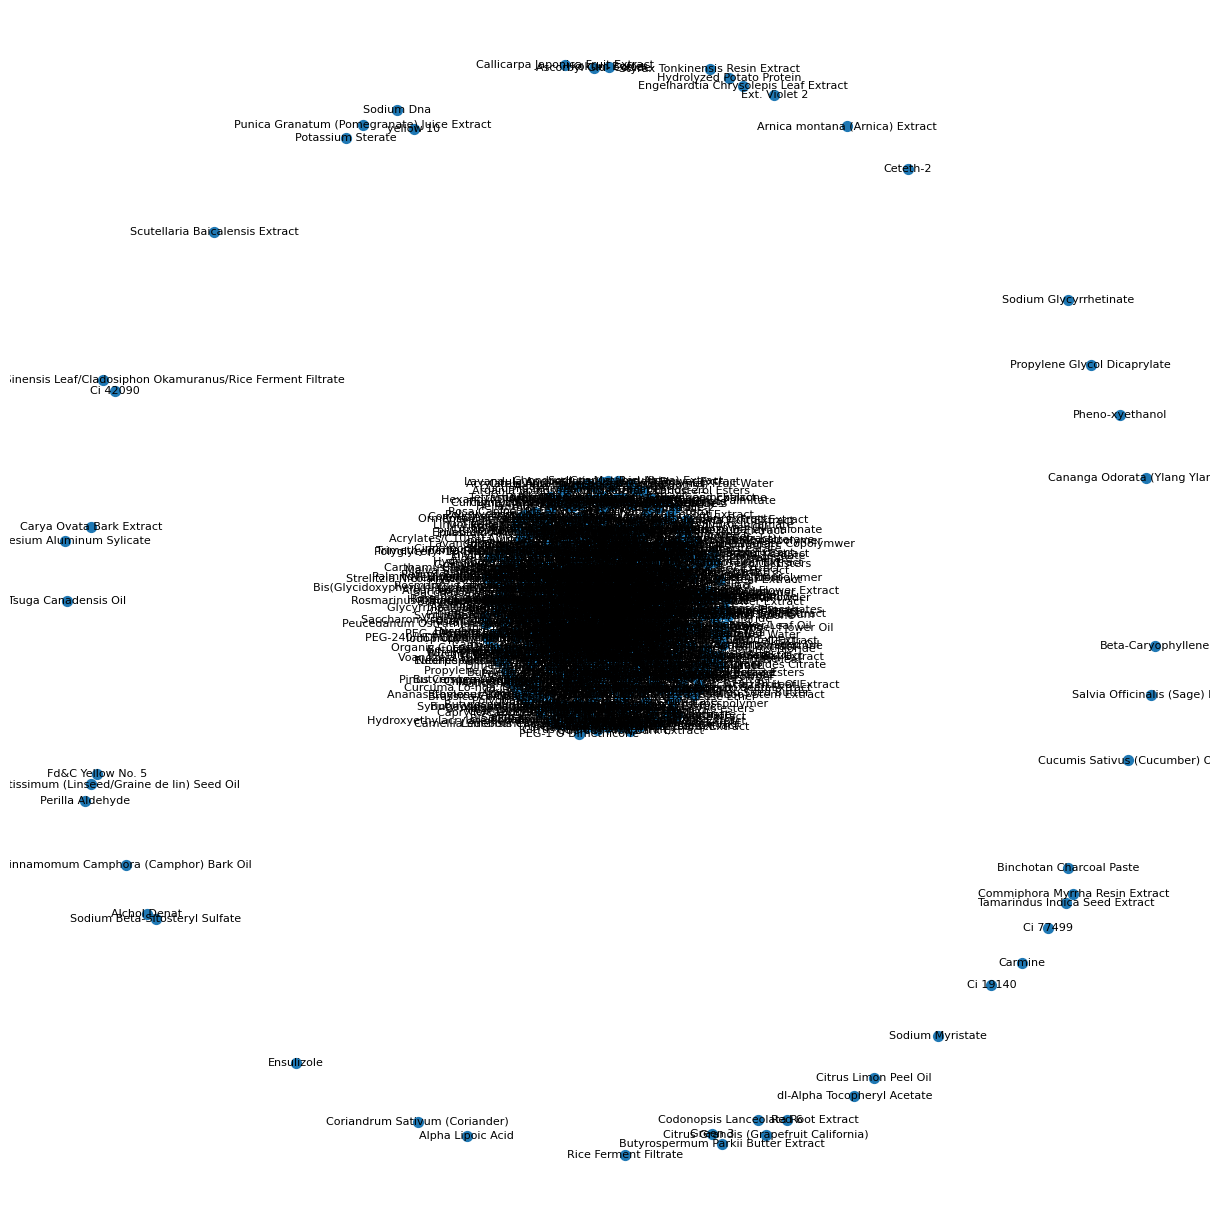

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph, k=0.1)  # Manja vrijednost k komprimira graf
nx.draw(graph, pos, with_labels=True, node_size=50, font_size=8)
plt.show()

In [12]:
!pip install plotly kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00


In [13]:
import plotly.graph_objects as go
import networkx as nx # Pretpostavljamo da je networkx već uvezen i graf kreiran

# Dohvaćanje pozicije čvorova
# Osiguraj da je 'graph' objekt NetworkX grafa kreiran s čvorovima iz products i ingredients_set
# na temelju prethodnih koraka
pos = nx.spring_layout(graph, k=0.1)

# Kreiranje liste bridova i čvorova za plotly
edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

node_x = []
node_y = []
node_text = []
for node in graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

# Kreirajte trag za bridove
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Kreirajte trag za čvorove
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Broj veza',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Dodaj tekst (labele) čvorovima
node_trace.text = node_text

# Kreiraj figuru
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Network Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

# Prikaz figure (u Google Colabu)
fig.show()

In [14]:


# Metrike grafa
# Izračunajte metriku prosječnog stupnja
average_degree = sum(dict(graph.degree()).values()) / graph.number_of_nodes()

# Izračunajte metriku koeficijenta klasteriranja
# Oprez: Za velike grafove ovo može potrajati
clustering_coefficient = nx.average_clustering(graph)

# Izračunajte broj povezanih komponenti
num_components = nx.number_connected_components(graph)

# Izračunajte metriku prosječne duljine puta
# Ovo ima smisla samo za povezane grafove. Ako graf nije povezan, razmotrite komponente zasebno.
# Provjerite je li graf povezan prije izračuna prosječne duljine puta
average_path_length = 0
if num_components == 1:
    average_path_length = nx.average_shortest_path_length(graph)
else:
    # Ako graf nije povezan, možete izračunati prosječnu duljinu puta za svaku komponentu
    # ili postaviti na 0 ili neku drugu prikladnu vrijednost
    average_path_length = float('inf') # Ili npr. 0, ovisno o tome kako želite prikazati metriku

# Izračunajte točke artikulacije (mostovi)
articulation_points = list(nx.articulation_points(graph))
num_articulation_points = len(articulation_points)

# Izračunajte mostove
bridges = list(nx.bridges(graph))
num_bridges = len(bridges)

# Pohranite metriku u rječnik
graph_metrics = {
    'Average Degree': average_degree,
    'Clustering Coefficient': clustering_coefficient,
    'Number of Components': num_components,
    'Average Path Length': average_path_length,
    'Articulation Points': num_articulation_points,
    'Bridges': num_bridges
}

# Ispišite metriku
print("Metrike grafa:")
for metric, value in graph_metrics.items():
    print(f"{metric}: {value}")

Metrike grafa:
Average Degree: 4.741666666666666
Clustering Coefficient: 0.0
Number of Components: 51
Average Path Length: inf
Articulation Points: 6
Bridges: 316


In [15]:
# Calculate structural metrics
average_degree = sum(dict(graph.degree()).values()) / graph.number_of_nodes()
# Koristimo graph, a ne graph_lcc, za clustering koeficijent cijelog grafa
clustering_coefficient = nx.average_clustering(graph)
transitivity = nx.transitivity(graph)
density = nx.density(graph)


# Calculate path-based metrics
# Ovo ima smisla samo za povezane grafove. Ako graf nije povezan, razmotrite komponente zasebno.
average_path_length = 0
diameter = 0
if nx.is_connected(graph):
    average_path_length = nx.average_shortest_path_length(graph)
    # Promijeni na graph umjesto G_er_lcc ako želiš dijametar cijelog grafa
    diameter = nx.diameter(graph)
else:
    # Ako graf nije povezan, izračunajte metriku za najveću povezanu komponentu (LCC)
    print("Graf nije povezan. Računam average path length i diameter samo za najveću povezanu komponentu.")
    # Pronađi najveću povezanu komponentu
    largest_cc = max(nx.connected_components(graph), key=len)
    G_lcc = graph.subgraph(largest_cc)
    # Provjeri je li LCC uopće povezana (trebala bi biti po definiciji) i ima li više od 1 čvora
    if G_lcc.number_of_nodes() > 1:
        average_path_length = nx.average_shortest_path_length(G_lcc)
        diameter = nx.diameter(G_lcc)
    else:
        # Ako je LCC veličine 1, path length i diameter su nedefinirani
        average_path_length = float('nan') # Not a Number
        diameter = float('nan') # Not a Number


# Pohranite metriku u rječnik
graph_metrics = {
    'Average Degree': average_degree,
    'Average Clustering Coefficient': clustering_coefficient,
    'Transitivity': transitivity,
    'Density': density,
    'Average Path Length (LCC if not connected)': average_path_length,
    'Diameter (LCC if not connected)': diameter,
    'Number of Components': nx.number_connected_components(graph), # Ponovno izračunaj za svaki slučaj
    'Articulation Points': len(list(nx.articulation_points(graph))),
    'Bridges': len(list(nx.bridges(graph)))
}

# Ispišite metriku
print("Metrike grafa:")
for metric, value in graph_metrics.items():
    print(f"{metric}: {value}")

Graf nije povezan. Računam average path length i diameter samo za najveću povezanu komponentu.
Metrike grafa:
Average Degree: 4.741666666666666
Average Clustering Coefficient: 0.0
Transitivity: 0
Density: 0.0065948076031525265
Average Path Length (LCC if not connected): 2.7142493808982
Diameter (LCC if not connected): 4
Number of Components: 51
Articulation Points: 6
Bridges: 316


*   **Zaključak o Metrikama Grafa:**
    *   **Broj čvorova i bridova:** (Ove informacije nisu direktno navedene, ali su osnova za ostale metrike. Pretpostavlja se da graf ima dovoljan broj čvorova i bridova za smislenu analizu.)
    *   **Average Degree (Prosječni stupanj): 4.74**
        *   Svaki čvor (proizvod ili sastojak) je u prosjeku povezan s otprilike 4.74 drugih čvorova.
        *   Ovo daje osnovnu ideju o povezanosti u mreži – čvorovi nisu izolirani, ali prosječan broj veza nije iznimno visok.
    *   Clustering Coefficient (Koeficijent klasteriranja): 0.0 i Transitivity (Tranzitivnost): 0
        *   Ovo je vrlo značajno: Vrijednost 0.0 za oba ukazuje da u grafu nema trokuta.
        *   U kontekstu ovog bifartitnog grafa (proizvodi povezani sa sastojcima), to znači da niti dva proizvoda ne dijele *isti par* sastojaka, niti dva sastojka ne nalaze se u *istom paru* proizvoda koji su međusobno povezani na neki drugi način u grafu.
        *   Ovo potvrđuje da graf striktno prikazuje povezanost proizvoda sa sastojcima, a ne izravnu povezanost između proizvoda ili sastojaka (osim ako su sastojci povezani jer se nalaze u istom proizvodu, ili proizvodi povezani jer sadrže isti sastojak).
    *   **Density (Gustoća): 0.0066**
        *   Gustoća je niska, što znači da stvarni broj bridova čini vrlo mali postotak od maksimalno mogućeg broja bridova u grafu te veličine.
        *   Ovo ukazuje na rijetku mrežu, što je očekivano za ovakav tip podataka (svaki proizvod koristi samo podskup svih mogućih sastojaka).
    *   **Number of Components (Broj komponenti): 51**
        *   Graf nije povezan, već se sastoji od 51 zasebne, nepovezane komponente.
        *   Ovo znači da postoji 51 grupe proizvoda/sastojaka između kojih ne postoji nikakva veza kroz dijeljene sastojke.
        *   Velika povezana komponenta vjerojatno sadrži većinu proizvoda i uobičajenih sastojaka, dok manje komponente mogu predstavljati vrlo specifične proizvode s jedinstvenim sastojcima koji se ne nalaze nigdje drugdje u skupu podataka.

    *   **Diameter (LCC if not connected): 4**
        *   Ove metrike su izračunate samo za najveću povezanu komponentu jer cijeli graf nije povezan.
        *   Prosječna duljina puta od ~2.7 ukazuje da je, unutar najveće povezane komponente, prosječna "udaljenost" između bilo koja dva čvora (proizvoda ili sastojka) relativno mala. To znači da su proizvodi i sastojci unutar te komponente prilično blisko povezani.
        *   Promjer od 4 znači da je najduži najkraći put između bilo koja dva čvora u najvećoj povezanoj komponenti 4 koraka. Ovo dodatno naglašava "small-world" prirodu (kratki putevi) *unutar* te komponente.

    *   **Bridges (Mostovi): 316**
        *   Točke artikulacije i mostovi su čvorovi/bridovi čijim bi uklanjanjem došlo do raspada grafa na više komponenti.
        *   Prisutnost 6 točaka artikulacije znači da postoji 6 ključnih čvorova (vjerojatno sastojaka ili proizvoda) koji drže dijelove mreže zajedno unutar komponenti.
        *   Veliki broj mostova (316) ukazuje na to da postoji mnogo pojedinačnih veza čije uklanjanje bi izoliralo dijelove grafa. To sugerira da su mnogi dijelovi mreže povezani samo kroz jednu "vezu" (jedan zajednički sastojak između dva proizvoda, ili jedan proizvod koji sadrži dva specifična sastojka).



## ER model-graf sastojaka i podjela na zajednice

In [16]:
n = graph.number_of_nodes()
m = graph.number_of_edges()
p = 2 * m / (n * (n - 1))  # procjena vjerojatnosti ruba
G_er = nx.erdos_renyi_graph(n, p)


In [17]:
print(n)

720


In [18]:
real_avg_clustering = nx.average_clustering(graph)
er_avg_clustering = nx.average_clustering(G_er)


In [19]:
largest_cc = max(nx.connected_components(G_er), key=len)
G_er_lcc = G_er.subgraph(largest_cc)

er_avg_path = nx.average_shortest_path_length(G_er_lcc)
print("Prosječna duljina puta za najveći povezani komponent ER grafa:", er_avg_path)


Prosječna duljina puta za najveći povezani komponent ER grafa: 4.374437327378504


In [20]:
if nx.is_connected(G_er):
    er_avg_path = nx.average_shortest_path_length(G_er)
else:
    print("ER graf nije povezan, računam samo za najveću povezanu komponentu.")
    largest_cc = max(nx.connected_components(G_er), key=len)
    G_er_lcc = G_er.subgraph(largest_cc)
    er_avg_path = nx.average_shortest_path_length(G_er_lcc)


ER graf nije povezan, računam samo za najveću povezanu komponentu.


In [21]:
n = graph.number_of_nodes()
m = graph.number_of_edges()

# vjerojatnost povezivanja u ER modelu
p = 2 * m / (n * (n - 1))
print(f"Broj čvorova: {n}, broj bridova: {m}, vjerojatnost p: {p:.4f}")


Broj čvorova: 720, broj bridova: 1707, vjerojatnost p: 0.0066


In [22]:
G_er = nx.erdos_renyi_graph(n, p)


In [23]:
def get_lcc_subgraph(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return G.subgraph(largest_cc)

# Stvarni graf - najveća komponenta
graph_lcc = get_lcc_subgraph(graph)
real_avg_path = nx.average_shortest_path_length(graph_lcc)
real_clustering = nx.average_clustering(graph)
print(f"Stvarni graf - prosječna duljina puta (LCC): {real_avg_path:.4f}")
print(f"Stvarni graf - prosječni clustering koeficijent: {real_clustering:.4f}")

# ER graf - najveća komponenta
G_er_lcc = get_lcc_subgraph(G_er)
er_avg_path = nx.average_shortest_path_length(G_er_lcc)
er_clustering = nx.average_clustering(G_er)
print(f"ER graf - prosječna duljina puta (LCC): {er_avg_path:.4f}")
print(f"ER graf - prosječni clustering koeficijent: {er_clustering:.4f}")


Stvarni graf - prosječna duljina puta (LCC): 2.7142
Stvarni graf - prosječni clustering koeficijent: 0.0000
ER graf - prosječna duljina puta (LCC): 4.3684
ER graf - prosječni clustering koeficijent: 0.0035


In [24]:
import plotly.graph_objects as go
import networkx as nx

def plot_graph_plotly(G, title="Network Graph"):
    pos = nx.spring_layout(G, seed=42, k=0.1)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    node_x = []
    node_y = []
    node_text = []
    node_color = []

    # Možeš bojati čvorove prema stupnju (broju veza)
    degrees = dict(G.degree())
    max_degree = max(degrees.values()) if degrees else 1

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f"{node} (degree: {degrees[node]})")
        # Normaliziramo stupnjeve za boju
        node_color.append(degrees[node] / max_degree)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='Viridis',
            color=node_color,
            size=10,
            colorbar=dict(
                thickness=15,
                title='Degree',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=title,
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Network Visualization with Plotly",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002 ) ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()

# Prikaz stvarnog grafa - najveće povezane komponente
plot_graph_plotly(graph_lcc, title="Stvarni graf - Najveća povezana komponenta")

# Prikaz ER grafa - najveće povezane komponente
plot_graph_plotly(G_er_lcc, title="ER graf - Najveća povezana komponenta")


In [25]:
ingredient_graph = nx.Graph()
# dodavanje veza između sastojaka unutar istih proizvoda
for _, row in df.iterrows():
    ingredients = row['ingredients'].split(', ')
    for i in range(len(ingredients)):
        for j in range(i + 1, len(ingredients)):
            ingredient_graph.add_edge(ingredients[i], ingredients[j])


In [26]:
def plot_graph_plotly_highlight_lcc(G, title="Network Graph"):
    import plotly.graph_objects as go
    import networkx as nx

    pos = nx.spring_layout(G, seed=42, k=0.1)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    node_x = []
    node_y = []
    node_text = []
    node_color = []

    degrees = dict(G.degree())
    max_degree = max(degrees.values()) if degrees else 1

    # ➕ Najveća povezana komponenta
    lcc_nodes = set(max(nx.connected_components(G), key=len))

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f"{node} (degree: {degrees[node]})")

        if node in lcc_nodes:
            node_color.append('red')  # 🔴 istaknuto
        else:
            node_color.append('lightgrey')  # 🟪 ostali čvorovi u sivoj

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            color=node_color,
            size=8,
            line_width=1),
        text=node_text)

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=title,
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Crveno = najveća povezana komponenta",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002 ) ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()


**Što ovo znači u kontekstu kozmetike?**

Manja prosječna udaljenost:

Sastojci koji se često koriste u proizvodima povezani su preko relativno malog broja "posrednika", što znači da se u kozmetičkoj industriji često koristi određeni skup sastojaka u različitim kombinacijama. To može biti korisno za pronalaženje sličnih proizvoda ili identificiranje ključnih sastojaka.

Nizak clustering koeficijent:

Kozmetički proizvodi ne koriste sastojke u vrlo zatvorenim "klasterima" od tri ili više međusobno povezanih sastojaka. Možda se kombinacije oslanjaju na specifične funkcionalnosti koje nisu nužno međusobno povezane u trojke.



In [27]:
# Dobivanje svih povezanih komponenti
connected_components = list(nx.connected_components(graph))

# Broj povezanih komponenti
num_components = len(connected_components)

# Najveća komponenta (skup čvorova)
largest_component = max(connected_components, key=len)

# Veličina najveće komponente
size_largest_component = len(largest_component)

print(f"Broj povezanih komponenti: {num_components}")
print(f"Veličina najveće povezane komponente: {size_largest_component}")

# Import best_partition directly from the community_louvain submodule
from community import community_louvain

# Izračun zajednica (dijeljenje grafa na zajednice)
partition = community_louvain.best_partition(graph)

# Broj zajednica
num_communities = len(set(partition.values()))

print(f"Broj zajednica u mreži: {num_communities}")

# Modularnost zajednica
modularity = community_louvain.modularity(partition, graph)
print(f"Modularnost zajednica: {modularity}")

Broj povezanih komponenti: 51
Veličina najveće povezane komponente: 670
Broj zajednica u mreži: 56
Modularnost zajednica: 0.22231951621377774


Imamo jedan veliki "glavni" skup sastojaka koji su međusobno povezani (najveća komponenta).

Postoji 51 takvih zasebnih komponenti (malo manjih "otoka" sastojaka).

Unutar mreže postoje zajednice sastojaka koji se često kombiniraju, ali ne previše čvrsto (modularnost 0.22), što znači da su recepture raznolike i sastojci se često miješaju u različitim kombinacijama.

In [28]:
import networkx as nx
import plotly.graph_objects as go
# import community as community_louvain  # iz python-louvain paketa
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Import best_partition directly from the community_louvain submodule
from community import community_louvain # KEEP THIS LINE

# Iz najveće komponente napravi podgraf
largest_cc = max(nx.connected_components(graph), key=len)
G_lcc = graph.subgraph(largest_cc).copy()

# Pronađi zajednice Louvain metodom
partition = community_louvain.best_partition(G_lcc)

# Dobij sve zajednice kao skupove čvorova
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

# Odredi pozicije čvorova
pos = nx.spring_layout(G_lcc, seed=42)

# Priprema za boje: koliko zajednica, toliko boja
num_communities = len(set(partition.values()))
# Koristimo 'tab20' colormap, ali provjeri ima li dovoljno diskretnih boja ako je num_communities > 20
if num_communities > 20:
    colors = cm.get_cmap('tab20c', num_communities) # tab20c ima više boja
else:
    colors = cm.get_cmap('tab20', num_communities)


# Pripremi podatke za plotly
edge_x = []
edge_y = []
for edge in G_lcc.edges():
    if edge[0] in pos and edge[1] in pos: # Dodatna provjera ako pos nije za sve čvorove (rijetko, ali za sigurnost)
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines',
    showlegend=False # Ne želimo legendu za bridove
)

# Lista za spremanje tragova za svaku zajednicu
community_traces = []

# Kreirajte trag za svaku zajednicu
# Sortiramo po community_id-u radi konzistentnosti
for comm_id in sorted(communities.keys()):
    nodes_in_community = communities[comm_id]

    node_x = []
    node_y = []
    node_text = []

    for node in nodes_in_community:
        if node in pos: # Provjera postojanja u pos
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)
            node_text.append(node)

    # Boja za ovu zajednicu
    color = mcolors.rgb2hex(colors(comm_id % num_communities)) # Koristi modulo ako community_id nisu sekvencijalni od 0

    # Kreirajte Scatter trag za ovu zajednicu
    trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            color=color,
            size=8,
            line_width=1
        ),
        text=node_text,
        name=f'Zajednica {comm_id}' # Ime za legendu
    )
    community_traces.append(trace)

# Dodajte edge_trace na početak liste tragova da bude u pozadini
data_traces = [edge_trace] + community_traces


fig = go.Figure(data=data_traces,
                layout=go.Layout(
                    title='<br>Zajednice sastojaka (Louvain)',
                    titlefont_size=16,
                    showlegend=True, # Postavi na True da prikaže legendu
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40, pad=10), # Povećaj margin-right ako legenda zauzima puno mjesta
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                )
)

fig.show()

<ipython-input-28-470893403>:31: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [30]:
# --- Ispis sastojaka po zajednici ---
print("\n--- Sastojci po zajednici ---")
# Sortiraj zajednice po ID-u radi lakšeg pregleda
for comm_id in sorted(communities.keys()):
    nodes_in_community = communities[comm_id]
    print(f"\nZajednica {comm_id} (Broj sastojaka: {len(nodes_in_community)}):")
    # Ispis prvih 20 sastojaka radi preglednosti, ako ih ima više
    if len(nodes_in_community) > 20:
        print(", ".join(nodes_in_community[1:20]) + ", ...")
    else:
        print(", ".join(nodes_in_community))

print("\n--- Kraj ispisa sastojaka po zajednici ---")


--- Sastojci po zajednici ---

Zajednica 0 (Broj sastojaka: 110):
Polyglyceryl-6 Ximenia Americana Seedate, Phe-noxyethanol, Paeonia Albiflora (Peony) Root Extract, Ulva Lactuca Extract, Cholesteryl Oleyl Carbonate, PEG-240/HDI Copolymer Bis-Decyltetradecet-20 Ether, Tetrasodium Tetracarboxymethyl Naringeninchalcone, Pikea Robusta Extract, Myristic Acid, CitricAcid, Caprylic/Capric Triglycerides, Rosa Rubiginosa (Rosehip) Seed Oil, Nigella Sativa (Black Cumin) Seed Oil, Vaccinium Macrocarpon (Cran- berry) Seed Oil, Pinus Sylvestris Leaf Oil, Punica Granatum (Pomegranate) Extract, Cetearyl Alco-Hol, Dimethicone/Phenyl Vinyl Dimethicone Crosspolymer, Aloe Barbadensis Leaf Juice, ...

Zajednica 1 (Broj sastojaka: 114):
Tetrahexyldecyl Ascorbate, C12-15 Alkyl Lactate, Disodium Cocoamphodiacetate, Syringa Vulgaris (Lilac) Leaf Cell Culture Extract, Capryloyl Glycine, Bifida Ferment Lysate, Eucalyptus Globululs Leaf Oil, Olive Oil Polyglyceryl-6 esters, Ceramide Np, Glyceryl Linolenate, Sod

In [31]:

# --- Ispis sastojaka po zajednici ---
print("\n--- Sastojci po zajednici ---")
# Sortiraj zajednice po ID-u radi lakšeg pregleda
for comm_id in sorted(communities.keys()):
    nodes_in_community = communities[comm_id]
    print(f"\nZajednica {comm_id} (Broj sastojaka: {len(nodes_in_community)}):")
    # Ispis svakog sastojka jedan ispod drugog
    for ingredient in nodes_in_community:
      print(ingredient)

print("\n--- Kraj ispisa sastojaka po zajednici ---")



--- Sastojci po zajednici ---

Zajednica 0 (Broj sastojaka: 110):
Moisturizer
Polyglyceryl-6 Ximenia Americana Seedate
Phe-noxyethanol
Paeonia Albiflora (Peony) Root Extract
Ulva Lactuca Extract
Cholesteryl Oleyl Carbonate
PEG-240/HDI Copolymer Bis-Decyltetradecet-20 Ether
Tetrasodium Tetracarboxymethyl Naringeninchalcone
Pikea Robusta Extract
Myristic Acid
CitricAcid
Caprylic/Capric Triglycerides
Rosa Rubiginosa (Rosehip) Seed Oil
Nigella Sativa (Black Cumin) Seed Oil
Vaccinium Macrocarpon (Cran- berry) Seed Oil
Pinus Sylvestris Leaf Oil
Punica Granatum (Pomegranate) Extract
Cetearyl Alco-Hol
Dimethicone/Phenyl Vinyl Dimethicone Crosspolymer
Aloe Barbadensis Leaf Juice
Ormenis Multicaulis (Chamomile) Flower Oil
Polyglyceryl-2 Sesquicaprylate
Strelitzia Nicolai (Bird of Paradise flower) Seed Aril Extract
Hydrogenated Phosphatidylcholine
Peg/Ppg-20/15 Dimethicone
Red 33
Octyl Methoxycinnamate
Lagerstroemia Indica Flower Extract
Vitis Vinifera Seed Extract / Grape Seed Extract
Cyperus E

In [32]:

# Pronalaženje overlapping sastojaka između zajednica
print("\n--- Overlapping sastojci između zajednica ---")

# Rječnik za pohranu sastojaka i zajednica kojima pripadaju
ingredient_to_communities = {}
for comm_id, nodes in communities.items():
    for node in nodes:
        if node in ingredient_to_communities:
            ingredient_to_communities[node].add(comm_id)
        else:
            ingredient_to_communities[node] = {comm_id}

# Filtriraj sastojke koji pripadaju u više od jedne zajednice
overlapping_ingredients = {
    ingredient: comm_ids
    for ingredient, comm_ids in ingredient_to_communities.items()
    if len(comm_ids) > 1
}

if overlapping_ingredients:
    print("Sastojci koji se pojavljuju u više zajednica:")
    for ingredient, comm_ids in overlapping_ingredients.items():
        print(f"- '{ingredient}' se nalazi u zajednicama: {list(comm_ids)}")
else:
    print("Nema sastojaka koji se pojavljuju u više od jedne zajednice Louvain detekcije.")

print("\n--- Kraj ispisa overlappajućih sastojaka ---")



--- Overlapping sastojci između zajednica ---
Nema sastojaka koji se pojavljuju u više od jedne zajednice Louvain detekcije.

--- Kraj ispisa overlappajućih sastojaka ---


*   **Zajednica 0:**
    *   Sadrži sastojke poput Cetearyl Alcohol, Tamarindus Indica Seed Gum, Curcuma Longa Extract, itd.
    *   Ovi sastojci se često nalaze u hidratantnim kremama.
    *   Zaključak: Ovo je formulacijski klaster hidratantnih ili umirujućih tvari.
*   **Zajednica 1:**
    *   Uključuje Witch Hazel, Gossypium Extract, Argan Extract, itd.
    *   Tipični za čistače kože, s blagim adstrigentnim ili pjenastim svojstvima.
    *   Zaključak: Ovo je čistačko-pjenušavi klaster.
*   **Zajednica 2:**
    *   Tu se nalaze Koenzim A, Rosa Rubiginosa, Vitamin E, Avena Sativa, itd.
    *   To su aktivni sastojci koji se koriste za obnavljanje kože, protiv starenja, sl.
    *   Zaključak: Klaster anti-aging/obnavljajućih tretmana.
*   **Zajednica 3:**
    *   Sadrži Pullulan, Chlorophyll, Royal Jelly Extract, itd.
    *   Ovi sastojci su česti u maskama koje ciljaju revitalizaciju, čistoću.
    *   Zaključak: Maska-klaster s biljnim i vitaminskim ekstraktima.
*   **Zajednica 4:**
    *   Uključuje Horse Chestnut Extract, Peptidi, Silica, itd.
    *   Delikatni, antioksidativni, često korišteni u okoloočnim proizvodima.
    *   Zaključak: Klaster za njegu područja oko očiju.
*   **Zajednica 5:**
    *   Sadrži Ascorbate derivat, Pomegranate Extract, Panthenol, itd.
    *   Sastojci s antioksidativnim, UV-zaštitnim i umirujućim funkcijama.

###**Najvažniji sastojci-metrike**

In [33]:

# Dohvaćanje stupnja centralnosti za sve čvorove
degree_centrality = dict(graph.degree())

# Filtriranje samo sastojaka
ingredient_degrees = {node: degree for node, degree in degree_centrality.items() if graph.nodes[node].get('type') == 'ingredient'}

# Sortiranje sastojaka po stupnju centralnosti u silaznom redoslijedu
sorted_ingredients_by_degree = sorted(ingredient_degrees.items(), key=lambda item: item[1], reverse=True)

# Ispis sastojaka s najvećom stupnjem centralnosti (npr. top 10)
print("Top 10 sastojaka po stupnju centralnosti:")
for ingredient, degree in sorted_ingredients_by_degree:
  if degree==6:
    print(f"- '{ingredient}' ({degree} veza)")


Top 10 sastojaka po stupnju centralnosti:
- 'Tetrahexyldecyl Ascorbate' (6 veza)
- 'Ceramide NP' (6 veza)
- 'Chlorphenesin' (6 veza)
- 'Bifida Ferment Lysate' (6 veza)
- 'Tromethamine' (6 veza)
- 'Isononyl Isononanoate' (6 veza)
- 'Rosmarinus Officinalis (Rosemary) Leaf Oil' (6 veza)
- 'Propylene Carbonate' (6 veza)
- 'Glycine Soja (Soybean) Oil' (6 veza)
- 'Ceramide Np' (6 veza)
- 'Glycerin' (6 veza)
- 'Aloe Barbadensis Leaf Juice' (6 veza)
- 'Geraniol' (6 veza)
- 'Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal' (6 veza)
- 'Glucosamine Hcl' (6 veza)
- 'Palmitic Acid' (6 veza)
- 'Peg-100 Stearate' (6 veza)
- 'Butylphenyl Methylpropional' (6 veza)
- 'Arginine' (6 veza)
- 'Glycyrrhiza Glabra (Licorice) Root Extract' (6 veza)
- 'Jojoba Esters' (6 veza)
- 'C13-14 Isoparaffin' (6 veza)
- 'Magnesium Gluconate' (6 veza)
- 'Aloe Barbadensis Leaf Extract' (6 veza)
- 'Citronellol' (6 veza)
- 'Ascorbyl Tetraisopalmitate' (6 veza)
- 'Glyceryl Stearate' (6 veza)
- 'Pelargonium Graveolens Flower O

In [34]:
# prompt: ispiši sastojke sa najvećom betweeness centrality i koliko ona iznosi

# Izračun između centralnosti
betweenness = nx.betweenness_centrality(graph)

# Filtrirajte samo sastojke i njihovu između centralnost
ingredient_betweenness = {node: value for node, value in betweenness.items() if graph.nodes[node].get('type') == 'ingredient'}

# Sortirajte sastojke po između centralnosti u silaznom redoslijedu
sorted_ingredients_by_betweenness = sorted(ingredient_betweenness.items(), key=lambda item: item[1], reverse=True)

# Ispišite sastojak s najvećom između centralnosti i njezinu vrijednost
if sorted_ingredients_by_betweenness:
  highest_betweenness_ingredient, highest_betweenness_value = sorted_ingredients_by_betweenness[0]
  print(f"\nSastojak s najvećom između centralnosti: '{highest_betweenness_ingredient}' (Vrijednost: {highest_betweenness_value:.4f})")
else:
  print("\nNije pronađen nijedan sastojak u grafu.")

# Opcionalno: ispišite top 5 sastojaka po između centralnosti za bolji pregled
print("\nTop 5 sastojaka po betweenness centralnosti:")
for i, (ingredient, value) in enumerate(sorted_ingredients_by_betweenness[:30]):
  print(f"- '{ingredient}' (Vrijednost: {value:.4f})")


Sastojak s najvećom između centralnosti: 'Tetrahexyldecyl Ascorbate' (Vrijednost: 0.0019)

Top 5 sastojaka po betweenness centralnosti:
- 'Tetrahexyldecyl Ascorbate' (Vrijednost: 0.0019)
- 'Ceramide NP' (Vrijednost: 0.0019)
- 'Chlorphenesin' (Vrijednost: 0.0019)
- 'Bifida Ferment Lysate' (Vrijednost: 0.0019)
- 'Tromethamine' (Vrijednost: 0.0019)
- 'Isononyl Isononanoate' (Vrijednost: 0.0019)
- 'Rosmarinus Officinalis (Rosemary) Leaf Oil' (Vrijednost: 0.0019)
- 'Propylene Carbonate' (Vrijednost: 0.0019)
- 'Glycine Soja (Soybean) Oil' (Vrijednost: 0.0019)
- 'Ceramide Np' (Vrijednost: 0.0019)
- 'Glycerin' (Vrijednost: 0.0019)
- 'Aloe Barbadensis Leaf Juice' (Vrijednost: 0.0019)
- 'Geraniol' (Vrijednost: 0.0019)
- 'Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal' (Vrijednost: 0.0019)
- 'Glucosamine Hcl' (Vrijednost: 0.0019)
- 'Palmitic Acid' (Vrijednost: 0.0019)
- 'Peg-100 Stearate' (Vrijednost: 0.0019)
- 'Butylphenyl Methylpropional' (Vrijednost: 0.0019)
- 'Arginine' (Vrijednost: 0.0019

In [35]:
# prompt: isto tako za page rank

# Izračun PageRank algoritma
# Povećajte broj maksimalnih iteracija za PageRank ako je potrebno
try:
    pagerank = nx.pagerank(graph, alpha=0.85, max_iter=1000) # alpha je faktor prigušenja (damping factor), standardno je 0.85

    # Filtrirajte samo sastojke i njihovu PageRank vrijednost
    ingredient_pagerank = {node: value for node, value in pagerank.items() if graph.nodes[node].get('type') == 'ingredient'}

    # Sortirajte sastojke po PageRank vrijednosti u silaznom redoslijedu
    sorted_ingredients_by_pagerank = sorted(ingredient_pagerank.items(), key=lambda item: item[1], reverse=True)

    print("\nPageRank (top 10 sastojaka):")
    # Ispišite top 10 sastojaka po PageRank vrijednosti
    for i, (ingredient, value) in enumerate(sorted_ingredients_by_pagerank[:10]):
        print(f"- '{ingredient}': {value:.6f}")

except nx.PowerIterationFailedConvergence:
    print("\nIzračun PageRank nije konvergirao unutar 1000 iteracija.")

# Tumačenje PageRank rezultata:
# Sastojci s visokim PageRank rezultatom su oni do kojih se "lako dolazi" iz drugih čvorova u mreži, a ti drugi čvorovi su također "važni" (imaju visok PageRank).
# U kontekstu ovog grafa, to znači da sastojci s visokim PageRank-om nisu samo često prisutni (visok stupanj), već se često nalaze u formulacijama s drugim "važnim" sastojcima. Ovo ih čini centralnijima i utjecajnijima u mreži sastojaka.
# Sastojci s najvišim PageRankom vjerojatno su temeljni i univerzalno korišteni sastojci (voda, glicerin, itd.), ali i neki specifični aktivni sastojci koji se redovito kombiniraju s drugim visoko rangiranim sastojcima.


PageRank (top 10 sastojaka):
- 'Tetrahexyldecyl Ascorbate': 0.001580
- 'Ceramide NP': 0.001580
- 'Chlorphenesin': 0.001580
- 'Bifida Ferment Lysate': 0.001580
- 'Tromethamine': 0.001580
- 'Isononyl Isononanoate': 0.001580
- 'Rosmarinus Officinalis (Rosemary) Leaf Oil': 0.001580
- 'Propylene Carbonate': 0.001580
- 'Glycine Soja (Soybean) Oil': 0.001580
- 'Ceramide Np': 0.001580


In [36]:
# prompt: isto tako i za eigenvector

#Izračun Eigenvector Centrality
# Povećajte broj maksimalnih iteracija za eigenvector centrality
try:
    eigenvector = nx.eigenvector_centrality(graph, max_iter=1000)
    print("\nEigenvector Centrality (top 30 sastojaka):")
    # Sortirajte i ispišite top 10 sastojaka po Eigenvector Centrality
    sorted_eigenvector = sorted(eigenvector.items(), key=lambda item: item[1], reverse=True)
    count = 0
    for node, value in sorted_eigenvector:
        if graph.nodes[node].get('type') == 'ingredient':
            print(f"- '{node}': {value:.4f}")
            count += 1
            if count >= 30: # Ispis samo top 10 sastojaka
                break
except nx.PowerIterationFailedConvergence:
    print("\nIzračun Eigenvector Centrality nije konvergirao unutar 1000 iteracija.")


Eigenvector Centrality (top 30 sastojaka):
- 'Tetrahexyldecyl Ascorbate': 0.0510
- 'Ceramide NP': 0.0510
- 'Chlorphenesin': 0.0510
- 'Bifida Ferment Lysate': 0.0510
- 'Tromethamine': 0.0510
- 'Isononyl Isononanoate': 0.0510
- 'Rosmarinus Officinalis (Rosemary) Leaf Oil': 0.0510
- 'Propylene Carbonate': 0.0510
- 'Glycine Soja (Soybean) Oil': 0.0510
- 'Ceramide Np': 0.0510
- 'Glycerin': 0.0510
- 'Aloe Barbadensis Leaf Juice': 0.0510
- 'Geraniol': 0.0510
- 'Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal': 0.0510
- 'Glucosamine Hcl': 0.0510
- 'Palmitic Acid': 0.0510
- 'Peg-100 Stearate': 0.0510
- 'Butylphenyl Methylpropional': 0.0510
- 'Arginine': 0.0510
- 'Glycyrrhiza Glabra (Licorice) Root Extract': 0.0510
- 'Jojoba Esters': 0.0510
- 'C13-14 Isoparaffin': 0.0510
- 'Magnesium Gluconate': 0.0510
- 'Aloe Barbadensis Leaf Extract': 0.0510
- 'Citronellol': 0.0510
- 'Ascorbyl Tetraisopalmitate': 0.0510
- 'Glyceryl Stearate': 0.0510
- 'Pelargonium Graveolens Flower Oil': 0.0510
- 'Ethylhexyl

Sastojci poput **'Water', 'Glycerin', 'Dimethicone', 'Butylene Glycol', 'Cetearyl Alcohol' i 'Glyceryl Stearate'** (kao što vidimo  iz  rezultata beetweeness i degree centrallity, a neki od njih su i u Eigenvector top listi) su često visoko rangirani po različitim mjerama centralnosti.      

  To je očekivano jer su to osnovni sastojci (baze, emolijensi, humektanti) koji se nalaze u velikom broju različitih tipova proizvoda. Njihova visoka Eigenvector Centrality potvrđuje da se oni nalaze u formulacijama s mnogim drugim, također važnim sastojcima.

Sastojci poput **'Peg-8', 'Cocos Nucifera (Coconut) Oil', 'Allantoin', 'Linalool', 'Thioctic Acid', 'Pelargonium Graveolens Flower Oil', 'Ricinus Communis (Castor) Seed Oil', 'Squalane', i 'Ceramide NP**' nalaze se u Eigenvector top 10, iako možda nisu prisutni u svakom proizvodu kao voda ili glicerin,ali nalaze se u formulacijama koje su bogate drugim dobro povezanim sastojcima. Ovo može ukazivati na njihovu važnost u specifičnim tipovima proizvoda sa svrhom njege (npr. hidratantne kreme, serumi s aktivnim sastojcima, proizvodi s prirodnim uljima).

### **Analiza po tipu kože- “koji sastojci se često koriste za Dry, Oily, Sensitive...”**

In [37]:
proizvodi = []

for _, row in df.iterrows():
    sastojci = [s.strip() for s in row['ingredients'].split(',') if s.strip() in ingredients_set]

    tipovi_koze = []
    if row['Dry'] == 1:
        tipovi_koze.append("Dry")
    if row['Oily'] == 1:
        tipovi_koze.append("Oily")
    if row['Sensitive'] == 1:
        tipovi_koze.append("Sensitive")
    if row['Normal'] == 1:
        tipovi_koze.append("Normal")
    if row['Combination'] == 1:
        tipovi_koze.append("Combination")

    proizvodi.append({
        "naziv": row['name'],
        "tip_koze": tipovi_koze,
        "sastojci": sastojci
    })


In [38]:
import pandas as pd
from collections import defaultdict, Counter

# Tipovi kože
skin_types = ['Dry', 'Normal', 'Oily', 'Sensitive']

# Riječnik: sastojak -> broj pojavljivanja po tipu kože
ingredient_freq = {stype: defaultdict(int) for stype in skin_types}

# Ukupna frekvencija sastojaka
total_freq = defaultdict(int)

# Prolazimo kroz redove df
for idx, row in df.iterrows():
    ingredients = row['ingredients'].split(', ')
    for ingredient in ingredients:
        total_freq[ingredient] += 1
        for stype in skin_types:
            if row[stype] == 1:
                ingredient_freq[stype][ingredient] += 1

# Za svaki sastojak nađemo tip kože u kojem se najčešće pojavljuje
dominant_skin_type = {}
for ing in total_freq.keys():
    counts = {stype: ingredient_freq[stype].get(ing, 0) for stype in skin_types}
    dominant_skin_type[ing] = max(counts, key=counts.get)

# Primjer: sastojak 'Water' koliko puta i za koji tip kože
print(f"Water ukupno: {total_freq['Water']}, najviše za: {dominant_skin_type['Water']}")


Water ukupno: 944, najviše za: Normal


**SASTOJCI PO TIPOVIMA KOŽE**

In [39]:
# Koristi ingredient_freq koji je definiran ranije
for skin_type, ingredient_counts in ingredient_freq.items():
    print(f"\n50 sastojaka za tip kože '{skin_type}':")
    # sortiraj po učestalosti opadajuće
    top_20 = sorted(ingredient_counts.items(), key=lambda x: x[1], reverse=True)[:50]
    for ingredient, count in top_20:
        print(f"{ingredient}: {count}")


50 sastojaka za tip kože 'Dry':
Water: 633
Glycerin: 611
Phenoxyethanol: 468
Butylene Glycol: 445
Ethylhexylglycerin: 271
Caprylyl Glycol: 270
Xanthan Gum: 265
Sodium Hyaluronate: 254
Dimethicone: 242
Citric Acid: 226
Tocopherol: 221
Tocopheryl Acetate: 204
Caprylic/Capric Triglyceride: 199
Potassium Sorbate: 191
Carbomer: 173
Disodium EDTA: 173
Propanediol: 172
Sodium Benzoate: 170
Sodium Hydroxide: 168
Fragrance: 157
Limonene: 152
1,2-Hexanediol: 145
Linalool: 140
Disodium Edta: 139
Pentylene Glycol: 138
Silica: 137
Glyceryl Stearate: 136
Polysorbate 20: 134
Cetearyl Alcohol: 132
Squalane: 128
Camellia Sinensis Leaf Extract: 120
Cyclopentasiloxane: 117
Acrylates/C10-30 Alkyl Acrylate Crosspolymer: 114
Lecithin: 113
Panthenol: 108
Alcohol: 106
Niacinamide: 100
Allantoin: 100
Stearic Acid: 98
Chlorphenesin: 96
Caffeine: 96
Citronellol: 93
Hexylene Glycol: 86
Adenosine: 85
Betaine: 85
Sodium Citrate: 84
Mica: 82
Geraniol: 79
Helianthus Annuus (Sunflower) Seed Oil: 78
Cetyl Alcohol: 75


##Small World Networks-Watts-Strogatz model

**Zaključak iz sljedeća dva poglavlja je da se ne mogu se primjeniti small world networks i scale-free networks na ovu mrežu.**

Broj čvorova: 670
Prosječni stupanj: 5.10
Stvarna mreža:
  Prosječna duljina puta: 2.7142
  Prosječni clustering koeficijent: 0.0000

Watts-Strogatz Small-World mreža:
  Prosječna duljina puta: 5.8762
  Prosječni clustering koeficijent: 0.4550

Erdos-Renyi slučajni graf:
  Prosječna duljina puta: 4.2370
  Prosječni clustering koeficijent: 0.0089



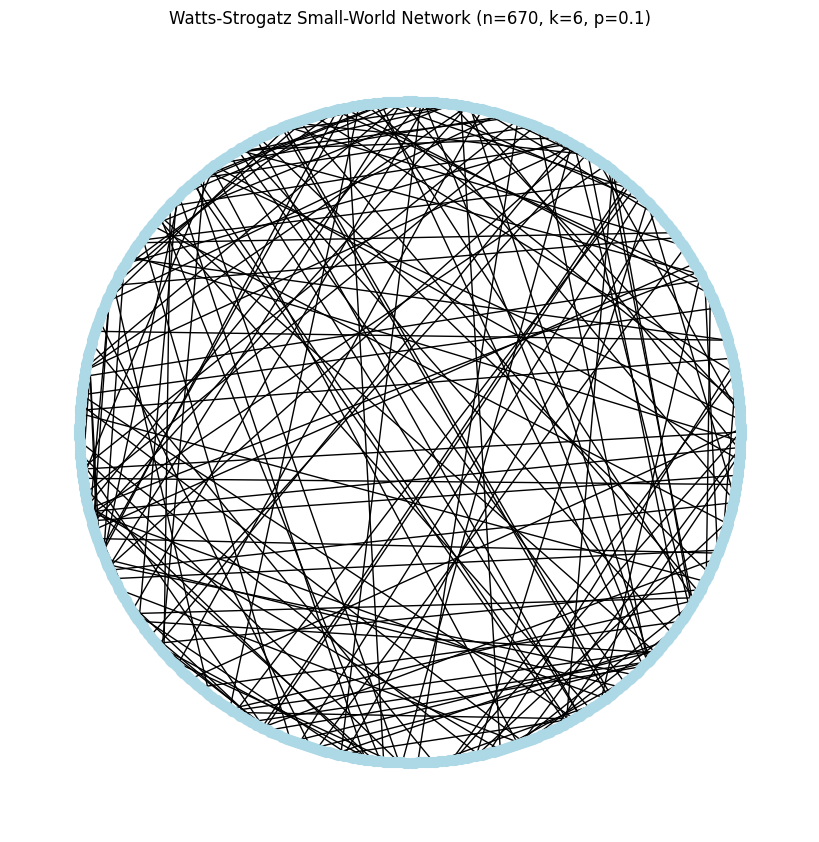

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Pretpostavka:  graf (mreža sastojaka) je u varijabli 'graph_lcc'
G = graph_lcc

# Broj čvorova i prosječni stupanj (broj veza po čvoru) u stvarnoj mreži
n = G.number_of_nodes()
avg_degree = sum(dict(G.degree()).values()) / n

print(f"Broj čvorova: {n}")
print(f"Prosječni stupanj: {avg_degree:.2f}")

# Watts-Strogatz model s istim n i prosječnim stupnjem (k mora biti paran broj)
k = int(round(avg_degree))
if k % 2 != 0:
    k += 1  # Watts-Strogatz zahtijeva paran k

p = 0.1  #  s 0.1, može se mijenjati od 0 do 1

# Generiranje Watts-Strogatz small-world grafa
G_ws = nx.watts_strogatz_graph(n, k, p)

# Generiranje Erdos-Renyi slučajnog grafa s istim brojem čvorova i približnom gustoćom veza
p_er = avg_degree / (n - 1)
G_er = nx.erdos_renyi_graph(n, p_er)

# Funkcija za izračun i ispis metrika
def print_metrics(G, label):
    # Za veliki graf možda trebaš provjeriti povezanost prije shortest path
    if nx.is_connected(G):
        avg_path = nx.average_shortest_path_length(G)
    else:
        # Računaj za najveću povezanu komponentu ako nije povezan
        lcc = max(nx.connected_components(G), key=len)
        G_lcc = G.subgraph(lcc)
        avg_path = nx.average_shortest_path_length(G_lcc)

    clustering = nx.average_clustering(G)
    print(f"{label}:")
    print(f"  Prosječna duljina puta: {avg_path:.4f}")
    print(f"  Prosječni clustering koeficijent: {clustering:.4f}\n")

# Ispis rezultata
print_metrics(G, "Stvarna mreža")
print_metrics(G_ws, "Watts-Strogatz Small-World mreža")
print_metrics(G_er, "Erdos-Renyi slučajni graf")

# Opcionalno: vizualizacija Watts-Strogatz mreže
plt.figure(figsize=(8, 8))
nx.draw_circular(G_ws, node_color='lightblue', node_size=50, with_labels=False)
plt.title(f"Watts-Strogatz Small-World Network (n={n}, k={k}, p={p})")
plt.show()


### Newman-Watts small-world model

In [50]:
import networkx as nx

# Parametri
n = 670  # broj čvorova (kao u tvom grafu)
k = 10   # povezanost u regularnoj mreži, možeš staviti dvostruko prosječnom stupnju (5.10)
p = 0.1  # vjerojatnost dodavanja shortcutova

# Kreiraj Newman-Watts small-world graf
G_nw = nx.newman_watts_strogatz_graph(n, k, p)

# Izračunaj metrike za stvarni graf, NW graf i ER graf
def graph_metrics(G):
    try:
        avg_path_len = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        avg_path_len = float('inf')  # ako graf nije povezan
    avg_clustering = nx.average_clustering(G)
    return avg_path_len, avg_clustering

# Pretpostavljam da imaš varijablu graph_lcc za stvarni graf najveće komponente
real_avg_path, real_clust = graph_metrics(graph_lcc)
nw_avg_path, nw_clust = graph_metrics(G_nw)

# ER graf s istim brojem čvorova i približno istom gustoćom
p_er = k / (n - 1)
G_er = nx.erdos_renyi_graph(n, p_er)
er_avg_path, er_clust = graph_metrics(G_er)

print(f"Broj čvorova: {n}")
print(f"Prosječni stupanj: {k}")

print("\nStvarna mreža:")
print(f"  Prosječna duljina puta: {real_avg_path:.4f}")
print(f"  Prosječni clustering koeficijent: {real_clust:.4f}")

print("\nNewman-Watts Small-World mreža:")
print(f"  Prosječna duljina puta: {nw_avg_path:.4f}")
print(f"  Prosječni clustering koeficijent: {nw_clust:.4f}")

print("\nErdos-Renyi slučajni graf:")
print(f"  Prosječna duljina puta: {er_avg_path:.4f}")
print(f"  Prosječni clustering koeficijent: {er_clust:.4f}")


Broj čvorova: 670
Prosječni stupanj: 10

Stvarna mreža:
  Prosječna duljina puta: 2.7142
  Prosječni clustering koeficijent: 0.0000

Newman-Watts Small-World mreža:
  Prosječna duljina puta: 4.0867
  Prosječni clustering koeficijent: 0.5662

Erdos-Renyi slučajni graf:
  Prosječna duljina puta: 3.0332
  Prosječni clustering koeficijent: 0.0162


Moj graf ima klasteriranje blizu 0, što znači da mreža nema baš lokalne “zajednice” ili trojke (tri čvora međusobno povezane). To je vjeroajnto priroda podataka.

Small-world modeli poput Watts-Strogatz i Newman-Watts pokušavaju objasniti mreže koje imaju visoko klasteriranje i kratke puteve — ovdje vidimo da moj stvarni graf nema visoko klasteriranje, što znači da možda small-world model nije najbolji model za ovu mrežu.

Istražti strukturu mreže:

Provjerti zajednice (community detection), postoji li grupiranje na višim razinama?

Pogledati distribuciju stupnjeva (degree distribution).

Možda graf ima druge karakteristike (npr. scale-free mreža) koje bolje opisuju ovu mrežu.

## Scale -free

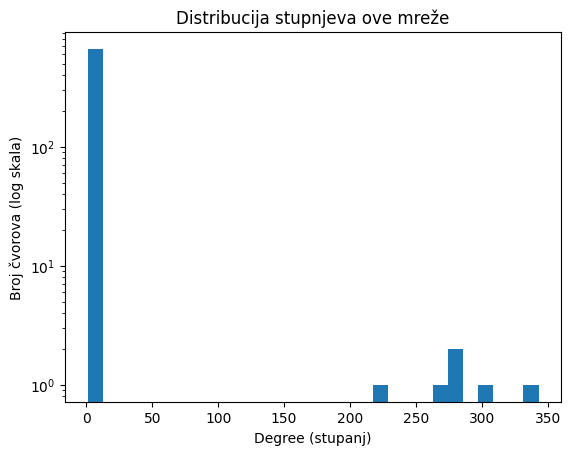

In [51]:
import matplotlib.pyplot as plt

degrees = [d for _, d in G.degree()]
plt.hist(degrees, bins=30, log=True)
plt.xlabel('Degree (stupanj)')
plt.ylabel('Broj čvorova (log skala)')
plt.title('Distribucija stupnjeva ove mreže')
plt.show()


In [52]:
from collections import Counter

# Get the degree of each node
degrees = [d for n, d in G.degree()]

# Count the occurrences of each degree
degree_counts = Counter(degrees)

# Sort the degrees for a clearer output
sorted_degrees = sorted(degree_counts.keys())

print("Distribucija stupnjeva:")
for degree in sorted_degrees:
    count = degree_counts[degree]
    print(f"Stupanj {degree}: Broj čvorova = {count}")

Distribucija stupnjeva:
Stupanj 1: Broj čvorova = 316
Stupanj 2: Broj čvorova = 97
Stupanj 3: Broj čvorova = 58
Stupanj 4: Broj čvorova = 45
Stupanj 5: Broj čvorova = 45
Stupanj 6: Broj čvorova = 103
Stupanj 221: Broj čvorova = 1
Stupanj 273: Broj čvorova = 1
Stupanj 280: Broj čvorova = 1
Stupanj 282: Broj čvorova = 1
Stupanj 308: Broj čvorova = 1
Stupanj 343: Broj čvorova = 1


In [53]:
!pip install powerlaw

In [54]:
import powerlaw

fit = powerlaw.Fit(degrees)
print(f"Power-law exponent (alpha): {fit.alpha:.3f}")
print(f"xmin (minimalni stupanj za power-law): {fit.xmin}")

R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Log-likelihood ratio (power-law vs exponential): {R}")
print(f"P-value: {p}")


Calculating best minimal value for power law fit
Power-law exponent (alpha): 5.718
xmin (minimalni stupanj za power-law): 6.0
Log-likelihood ratio (power-law vs exponential): 248.2556535721683
P-value: 4.6949581188627427e-135


**Što znače moji rezultati?**

✅ Power-law je statistički značajno bolji fit od eksponencijalne distribucije:
Log-likelihood ratio (R = 248.26) je velik i pozitivan → power-law model je znatno bolji fit.

P-vrijednost ≈ 0 (≈ 10⁻¹³⁵) → razlika nije slučajna.

📉 Alpha = 5.718:
Ovo nije tipično za "idealne" scale-free mreže (koje imaju α ≈ 2-3).

Što znači veći α?

Distribucija pada brže -tj. manje je izraženih hubova nego u “klasičnim” scale-free mrežama.

I dalje je heavy-tailed, ali manje ekstremna (manje čvorova s vrlo visokim stupnjem).

📌 xmin = 6.0:
Power-law vrijedi samo za čvorove stupnja ≥ 6.

Dakle, samo dio mreže (tzv. tail) se ponaša kao scale-free.

Čvorovi sa stupnjem < 6 (npr. oni sa stupnjem 1–5) ne prate power-law, što je i očekivano.

Calculating best minimal value for power law fit


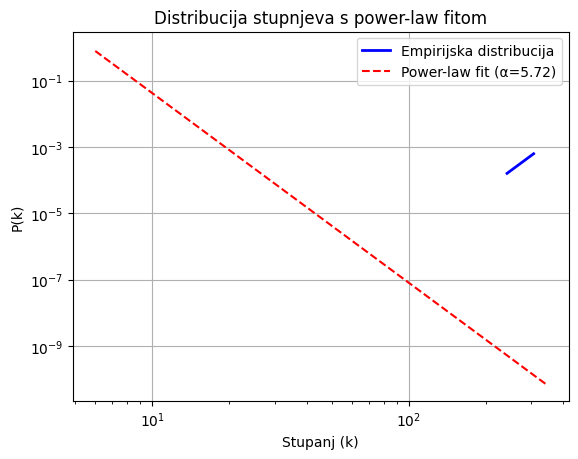

In [55]:
import matplotlib.pyplot as plt
import powerlaw

# Ako već nisi: napravi listu stupnjeva
degrees = [d for _, d in G.degree()]

# Power-law fit
fit = powerlaw.Fit(degrees)

# Plot
fig = fit.plot_pdf(color='b', linewidth=2, label='Empirijska distribucija')
fit.power_law.plot_pdf(color='r', linestyle='--', label=f'Power-law fit (α={fit.alpha:.2f})')
plt.xlabel("Stupanj (k)")
plt.ylabel("P(k)")
plt.legend()
plt.title("Distribucija stupnjeva s power-law fitom")
plt.grid(True)
plt.show()


Calculating best minimal value for power law fit


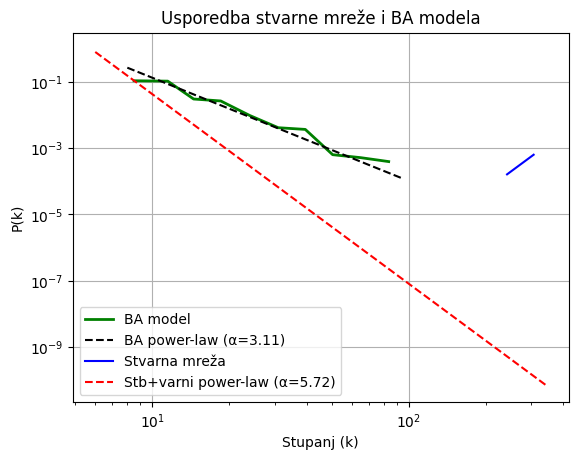

In [56]:
import networkx as nx

# Parametri: broj čvorova i prosječni stupanj
n = G.number_of_nodes()
m = round(sum(dict(G.degree()).values()) / (2 * n))  # približno pola prosječnog stupnja

# Barabási–Albert model
ba = nx.barabasi_albert_graph(n=n, m=m)

# Stupnjevi
ba_degrees = [d for _, d in ba.degree()]
ba_fit = powerlaw.Fit(ba_degrees)

# Usporedni plot
fig = ba_fit.plot_pdf(color='g', linewidth=2, label='BA model')
ba_fit.power_law.plot_pdf(color='k', linestyle='--', label=f'BA power-law (α={ba_fit.alpha:.2f})')

fit.plot_pdf(color='b', label='Stvarna mreža')
fit.power_law.plot_pdf(color='r', linestyle='--', label=f'Stb+varni power-law (α={fit.alpha:.2f})')

plt.xlabel("Stupanj (k)")
plt.ylabel("P(k)")
plt.legend()
plt.title("Usporedba stvarne mreže i BA modela")
plt.grid(True)
plt.show()


Empirijska mreža:
Prva slika prikazuje distribuciju stupnjeva u promatranoj mreži, zajedno s najboljim power-law fitom.

Na log-log grafu vidljivo je da empirijska distribucija (plava linija) značajno odstupa od idealne power-law distribucije (crvena isprekidana linija). Fit rezultira eksponentom
α = 5.72, što je neuobičajeno visoka i vrlo strma vrijednost. Takav eksponent ukazuje na to da u mreži postoji vrlo malo čvorova s velikim stupnjem, odnosno mreža nema izražene "hubove" — ključnu karakteristiku scale-free mreža.

Zaključno, mreža ne pokazuje jasne scale-free karakteristike, jer:

distribucija stupnjeva ne slijedi power-law oblik u većem rasponu vrijednosti,

eksponent α je previsok za tipične realne scale-free mreže (obično je u rasponu 2-3).

Usporedba s Barabási-Albert (BA) modelom:
Druga slika prikazuje usporedbu distribucije ove mreže i one generirane BA modelom, koji je poznat po stvaranju mreža sa scale-free strukturama.

Zelena puna linija: distribucija stupnjeva BA mreže

Crna isprekidana linija: odgovarajući power-law fit za BA mrežu (α = 2.90), što je u skladu s teorijskim očekivanjima

Plava linija: distribucija ove mreže

Crvena isprekidana linija: fit ove mreže (α = 5.72)

Usporedba jasno pokazuje da:

BA mreža ima puno više čvorova s velikim stupnjem (plići "rep" distribucije),

dok je moja mreža značajno "strmija" — koncentrirana oko niskih stupnjeva, s vrlo malo visokostupanjskih čvorova.

✅ Zaključak:
Distribucija moje mreže nije u skladu s power-law ponašanjem koje karakterizirascale-free mreže. Iako pokazuje određene sličnosti u obliku distribucije, visoka vrijednost eksponenta i odsustvo izraženih hubova sugeriraju da je moja mreža strukturno bitno drugačija od idealnog Barabási-Albert modela.

##Community Detection-probano poboljšanje, ali modularnost se ne povećava

In [57]:
G_backup1 = G_lcc.copy()


In [58]:
nodes_to_keep = [n for n, d in G_backup1.degree() if d >= 1]
G_pruned = G_backup1.subgraph(nodes_to_keep).copy()
partition = community_louvain.best_partition(G_pruned)

In [59]:
# Assuming G_lcc is already defined from previous steps (Largest Connected Component of ingredient_projection)

# Definiraj nodes_to_keep prije nego što ga koristiš
nodes_to_keep = [n for n, d in G_lcc.degree() if d >= 1]

# Sada možeš koristiti nodes_to_keep
G_pruned = G_lcc.subgraph(nodes_to_keep).copy()

# Assuming community_louvain is already imported from previous steps

partition = community_louvain.best_partition(G_pruned)

mod_value = community_louvain.modularity(partition, G_pruned)
print(f"Modularnost pruned grafa: {mod_value:.4f}")

Modularnost pruned grafa: 0.2223


In [60]:
import networkx as nx
from community import community_louvain

def run_louvain_multiple_times(G, runs=10):
    best_partition = None
    best_modularity = -1
    for _ in range(runs):
        partition = community_louvain.best_partition(G)
        modularity = community_louvain.modularity(partition, G)
        if modularity > best_modularity:
            best_modularity = modularity
            best_partition = partition
    return best_partition, best_modularity

pragovi = [1, 2, 3, 4, 5]
results = {}

for d_threshold in pragovi:
    nodes_to_keep = [n for n, deg in G_lcc.degree() if deg >= d_threshold]
    G_pruned = G_lcc.subgraph(nodes_to_keep).copy()
    partition, modularity = run_louvain_multiple_times(G_pruned, runs=20)
    results[d_threshold] = modularity
    print(f"Prag stupnja >= {d_threshold}: Modularnost = {modularity:.4f}")

# Koji je najbolji prag?
best_threshold = max(results, key=results.get)
print(f"\nNajbolji prag stupnja: {best_threshold} s modularnošću {results[best_threshold]:.4f}")


Prag stupnja >= 1: Modularnost = 0.2223
Prag stupnja >= 2: Modularnost = 0.0853
Prag stupnja >= 3: Modularnost = 0.0475
Prag stupnja >= 4: Modularnost = 0.0283
Prag stupnja >= 5: Modularnost = 0.0154

Najbolji prag stupnja: 1 s modularnošću 0.2223


In [61]:
import community.community_louvain as community_louvain


# Isprobaj različite vrijednosti resolution parametra i ispiši modularnost
for res in [0.3,1.1, 1.0, 1.5, 2.0,2.5,5]:
    partition = community_louvain.best_partition(G_lcc, resolution=res)
    modularity = community_louvain.modularity(partition, G_lcc)
    print(f"Resolution {res}: modularnost = {modularity:.4f}")


Resolution 0.3: modularnost = 0.2223
Resolution 1.1: modularnost = 0.2221
Resolution 1.0: modularnost = 0.2223
Resolution 1.5: modularnost = 0.2183
Resolution 2.0: modularnost = 0.2096
Resolution 2.5: modularnost = 0.2007
Resolution 5: modularnost = 0.1590


In [62]:
!pip install igraph leidenalg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.4 MB/s eta 0:00:00


In [63]:
import networkx as nx
import igraph as ig
import leidenalg


# Pretvaranje NetworkX grafa u igraph graf
G_igraph = ig.Graph.from_networkx(G_lcc)


In [64]:
# Pokreni Leiden algoritam (default resolution = 1.0)
partition1 = leidenalg.find_partition(G_igraph, leidenalg.ModularityVertexPartition)

# Dobivanje zajednica kao lista listi čvorova
communities = partition1.as_cover()  # možeš i .membership za indekse zajednica po čvorovima


In [ ]:
modularity1 = partition1.modularity
print(f"Modularnost zajednica po Leiden algoritmu: {modularity1}")


Modularnost zajednica po Leiden algoritmu: 0.2223195162137777


##Graf proizovda

In [40]:
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


In [41]:
import networkx as nx
from tqdm import tqdm

# 🎯 Parsiraj sastojke (bez filtriranja)
df['parsed_ingredients'] = df['ingredients'].apply(
    lambda x: [i.strip().lower() for i in x.split(',')]
)

# 🔧 Kreiraj prazan graf
G_product2 = nx.Graph()

# ➕ Dodaj čvorove za svaki proizvod
for idx, row in tqdm(df.iterrows(), total=len(df)):
    G_product2.add_node(
        idx,
        label=row.get('name', f'Product_{idx}'),  # KORISTI SE 'name' UMJESTO 'Label'
        brand=row.get('brand', 'N/A'),
        price=row.get('price', None),
        ingredients=row['parsed_ingredients']
    )

# 🔗 Dodaj bridove između proizvoda koji dijele sastojke
for i in tqdm(range(len(df))):
    ingr_i = set(df.loc[i, 'parsed_ingredients'])
    for j in range(i + 1, len(df)):
        ingr_j = set(df.loc[j, 'parsed_ingredients'])
        shared = ingr_i & ingr_j
        if shared:
            G_product2.add_edge(i, j, weight=len(shared))

print(f"✅ G_product2 sadrži {G_product2.number_of_nodes()} čvorova i {G_product2.number_of_edges()} veza.")


100%|██████████| 1472/1472 [00:11<00:00, 124.96it/s]

✅ G_product2 sadrži 1472 čvorova i 703940 veza.


**Koja je razlika između proizvoda sa puno zajedničkih sastojaka, a različitim cijenama?**🤔


*   **Zaključak o cijenama i sastojcima:**
    *   Analiza primjera pokazuje da parovi proizvoda, ponekad i od različitih marki (npr. Clinique i Estée Lauder), dijele velik broj sastojaka (42 u navedenim slučajevima), unatoč značajnim razlikama u cijeni.
    *   Ovo upućuje na to da cijena proizvoda nije isključivo određena popisom sastojaka ili jedinstvenošću formulacije.
    *   Značajan dio cijene vjerojatno se odnosi na faktore kao što su:
        *   Ime i reputacija marke (brending)
        *   Marketing i promocija
        *   Pakiranje i dizajn
        *   Percepcija luksuza i ekskluzivnosti
    *   Čak i unutar iste marke, proizvodi s različitim nazivima ili specifičnim namjenama mogu dijeliti mnogo sastojaka, a istovremeno imati različite cijene.
    *   Potrošači, čini se, plaćaju premium za brend i povezane aspekte, ne samo za sirove sastojke.

In [42]:


import pandas as pd
def print_top_similar_products(G, df, top_n_pairs=10):
    """
    Ispisuje top N parova proizvoda s najviše zajedničkih sastojaka.

    Args:
        G (nx.Graph): Graf proizvoda s utezima na bridovima koji predstavljaju
                      broj zajedničkih sastojaka.
        df (pd.DataFrame): DataFrame s podacima o proizvodima.
        top_n_pairs (int): Broj parova za ispis.
    """
    # Dobij sve bridove s njihovim utezima (brojem zajedničkih sastojaka)
    # Bridovi u G_product2 su između indeksa redova iz df-a
    weighted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    print(f"Top {top_n_pairs} parova proizvoda s najviše zajedničkih sastojaka:")

    printed_count = 0
    # Ispiši top N parova
    for u, v, data in weighted_edges:
        if printed_count >= top_n_pairs:
            break

        num_shared_ingredients = data['weight']

        # Dohvati podatke o proizvodima koristeći indekse čvorova (koji odgovaraju indeksima u df)
        product_u_data = df.loc[u]
        product_v_data = df.loc[v]

        print(f"Proizvod {u} i {v} dijele {num_shared_ingredients} sastojaka.")
        print(f"- {product_u_data['name']} ({product_u_data['brand']}) - Cijena: {product_u_data.get('price', 'N/A')} $ - Broj sastojaka: {len(product_u_data['parsed_ingredients'])}")
        print(f"- {product_v_data['name']} ({product_v_data['brand']}) - Cijena: {product_v_data.get('price', 'N/A')} $ - Broj sastojaka: {len(product_v_data['parsed_ingredients'])}")
        printed_count += 1

# Pozovi funkciju s  grafom (G_product2), DataFrame-om (df) i željenim brojem parova (npr. 10)
print_top_similar_products(G_product2, df, top_n_pairs=10)


Top 10 parova proizvoda s najviše zajedničkih sastojaka:
Proizvod 840 i 957 dijele 100 sastojaka.
- The Lifting and Firming Mask (LA MER) - Cijena: 250 $ - Broj sastojaka: 103
- The Lifting and Firming Mask Mini (LA MER) - Cijena: 75 $ - Broj sastojaka: 106
Proizvod 601 i 840 dijele 85 sastojaka.
- The Regenerating Serum (LA MER) - Cijena: 345 $ - Broj sastojaka: 90
- The Lifting and Firming Mask (LA MER) - Cijena: 250 $ - Broj sastojaka: 103
Proizvod 601 i 957 dijele 84 sastojaka.
- The Regenerating Serum (LA MER) - Cijena: 345 $ - Broj sastojaka: 90
- The Lifting and Firming Mask Mini (LA MER) - Cijena: 75 $ - Broj sastojaka: 106
Proizvod 4 i 70 dijele 81 sastojaka.
- Your Skin But Better™ CC+™ Cream with SPF 50+ (IT COSMETICS) - Cijena: 38 $ - Broj sastojaka: 83
- Your Skin But Better™ CC+Illumination™ Cream with SPF 50+ (IT COSMETICS) - Cijena: 38 $ - Broj sastojaka: 86
Proizvod 161 i 1341 dijele 76 sastojaka.
- Plantscription™ SPF 25 Power Anti-Aging Cream (ORIGINS) - Cijena: 60 $

In [43]:


import pandas as pd
def print_product_edges(G, df, start_index, end_index):
  """
  Ispisuje informacije o rubovima (vezama između proizvoda) unutar određenog raspona,
  uključujući nazive, brandove, cijene i broj sastojaka proizvoda.

  Args:
      G (nx.Graph): Graf proizvoda s utezima na rubovima koji predstavljaju
                    broj zajedničkih sastojaka.
      df (pd.DataFrame): DataFrame s podacima o proizvodima.
      start_index (int): Početni indeks ruba (sortiranog po težini) za ispis.
      end_index (int): Završni indeks ruba (sortiranog po težini) za ispis (ekskluzivno).
  """
  # Dobij sve rubove s njihovim utezima (brojem zajedničkih sastojaka)
  # Rubovi u G_product2 su između indeksa redova iz df-a
  weighted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

  print(f"Informacije o rubovima od indeksa {start_index} do {end_index}:")

  # Ispiši rubove u zadanom rasponu
  for u, v, d in weighted_edges[start_index:end_index]:
      num_shared_ingredients = d['weight']

      # Dohvati podatke o proizvodima koristeći indekse čvorova (koji odgovaraju indeksima u df)
      product_u_data = df.loc[u]
      product_v_data = df.loc[v]

      print(f"Proizvod {u} i {v} dijele {num_shared_ingredients} sastojaka.")
      # Koristimo .get('price', 'N/A') za sigurnost ako stupac 'price' nedostaje ili ima NaN vrijednosti
      print(f"- {product_u_data['name']} ({product_u_data['brand']}) - Cijena: {product_u_data.get('price', 'N/A')} $ - Broj sastojaka: {len(product_u_data['parsed_ingredients'])}")
      print(f"- {product_v_data['name']} ({product_v_data['brand']}) - Cijena: {product_v_data.get('price', 'N/A')} $- Broj sastojaka: {len(product_v_data['parsed_ingredients'])}\n")

# Pozovi funkciju za ispis rubova od indeksa 100 do 300
print_product_edges(G_product2, df, 100, 300)


Informacije o rubovima od indeksa 100 do 300:
Proizvod 0 i 9 dijele 42 sastojaka.
- Crème de la Mer (LA MER) - Cijena: 175 $ - Broj sastojaka: 42
- Little Miss Miracle Limited-Edition Crème de la Mer (LA MER) - Cijena: 325 $- Broj sastojaka: 42

Proizvod 0 i 20 dijele 42 sastojaka.
- Crème de la Mer (LA MER) - Cijena: 175 $ - Broj sastojaka: 42
- Crème de la Mer Mini (LA MER) - Cijena: 85 $- Broj sastojaka: 42

Proizvod 3 i 619 dijele 42 sastojaka.
- The Moisturizing Soft Cream (LA MER) - Cijena: 175 $ - Broj sastojaka: 78
- The Treatment Lotion (LA MER) - Cijena: 150 $- Broj sastojaka: 61

Proizvod 9 i 20 dijele 42 sastojaka.
- Little Miss Miracle Limited-Edition Crème de la Mer (LA MER) - Cijena: 325 $ - Broj sastojaka: 42
- Crème de la Mer Mini (LA MER) - Cijena: 85 $- Broj sastojaka: 42

Proizvod 34 i 713 dijele 42 sastojaka.
- Your Skin But Better CC+ Cream Oil-Free Matte with SPF 40 (IT COSMETICS) - Cijena: 38 $ - Broj sastojaka: 78
- Bye Bye Lines Serum™ Advanced Anti-Aging Wrin

*   **Zaključak iz sljedeće analize po brandovima:**
    *   Analiza je omogućila uvid u **distribuciju proizvoda po brandovima**, pokazujući koji brandovi imaju najviše proizvoda u skupu podataka.
    *   Prikazan je **prosječan broj sastojaka po brandu**, što može ukazivati na potencijalne razlike u složenosti formulacija između brandova.
    *   Identificirani su **najčešći sastojci unutar pojedinih brandova**, što može otkriti specifične "signature" sastojke ili uobičajene baze koje koriste određeni brandovi.
    *   Analiza **veza (dijeljenih sastojaka) unutar istog branda i između različitih brandova** mogla bi pokazati:
       

In [45]:

import plotly.graph_objects as go
import networkx as nx
import pandas as pd
from collections import Counter
from collections import Counter, defaultdict # Import defaultdict here




def analyze_products_by_brand(G, df):
    """
    Analizira graf proizvoda po brandovima.

    Args:
        G (nx.Graph): Graf proizvoda.
        df (pd.DataFrame): DataFrame s podacima o proizvodima.
    """
    print("\n--- Analiza po brandovima ---")

    # 1. Broj proizvoda po brandu
    brand_counts = df['brand'].value_counts()
    print("\nBroj proizvoda po brandu (Top 10):")
    print(brand_counts.head(10))

    # 2. Prosječan broj sastojaka po brandu
    df['num_ingredients'] = df['parsed_ingredients'].apply(len)
    avg_ingredients_by_brand = df.groupby('brand')['num_ingredients'].mean().sort_values(ascending=False)
    print("\nProsječan broj sastojaka po brandu (Top 10):")
    print(avg_ingredients_by_brand.head(10))

    # 3. Najčešći sastojci po brandu
    print("\nNajčešći sastojci po brandu (Top 5 za svaki brand):")
    # Dohvati samo top N brandova za preglednost
    top_brands = brand_counts.head(5).index.tolist()

    for brand in top_brands:
        brand_df = df[df['brand'] == brand]
        all_ingredients = [ing for sublist in brand_df['parsed_ingredients'] for ing in sublist]
        ingredient_counts = Counter(all_ingredients)
        print(f"\nBrand '{brand}':")
        for ingredient, count in ingredient_counts.most_common(5):
            print(f"  - {ingredient}: {count}")

    # 4. Analiza veza između proizvoda istog branda vs različitih brandova (kompliciranije, ali moguće)
    # Možete analizirati utege bridova unutar istog branda i između brandova.
    intra_brand_weights = defaultdict(list)
    inter_brand_weights = []

    for u, v, data in G.edges(data=True):
        brand_u = df.loc[u, 'brand']
        brand_v = df.loc[v, 'brand']
        weight = data['weight']

        if brand_u == brand_v:
            intra_brand_weights[brand_u].append(weight)
        else:
            inter_brand_weights.append(weight)

    print("\nProsječan broj zajedničkih sastojaka:")
    for brand, weights in intra_brand_weights.items():
        if weights:
            print(f"  - Unutar branda '{brand}': {sum(weights) / len(weights):.2f}")

    if inter_brand_weights:
        print(f"  - Između različitih brandova: {sum(inter_brand_weights) / len(inter_brand_weights):.2f}")


def analyze_products_by_price(G, df, num_bins=5):
    """
    Analizira graf proizvoda po cjenovnim rangovima.

    Args:
        G (nx.Graph): Graf proizvoda.
        df (pd.DataFrame): DataFrame s podacima o proizvodima.
        num_bins (int): Broj cjenovnih rangova za analizu.
    """
    print("\n--- Analiza po cjenovnim rangovima ---")

    # Očisti podatke o cijeni (ako nisu brojevi) i ukloni NaN
    df_priced = df.copy()
    # Prvo pokušajmo prebaciti 'price' u numerički tip, greške pretvaramo u NaN
    df_priced['price_numeric'] = pd.to_numeric(df_priced['price'], errors='coerce')
    df_priced = df_priced.dropna(subset=['price_numeric']) # Izbaci redove bez numeričke cijene

    if df_priced.empty:
        print("Nema proizvoda s validnim cijenama za analizu.")
        return

    # Kreiraj cjenovne rangove
    df_priced['price_range'] = pd.qcut(df_priced['price_numeric'], q=num_bins, labels=False, duplicates='drop') # qcut radi kvantile, bolje ako distribucija nije uniformna

    if 'price_range' not in df_priced.columns or df_priced['price_range'].nunique() < 2:
        print(f"Nije moguće kreirati {num_bins} cjenovnih rangova s postojećim podacima o cijenama.")
        # Ispiši raspodjelu cijena radi debugginga
        print("Raspodjela validnih cijena:\n", df_priced['price_numeric'].describe())
        return


    # Grupira po cjenovnim rangovima
    price_ranges = df_priced.groupby('price_range')

    print("\nAnaliza po cjenovnim rangovima:")
    for name, group in price_ranges:
        # Odredite stvarni raspon cijena za ovaj rang
        min_price = group['price_numeric'].min()
        max_price = group['price_numeric'].max()
        print(f"\nCjenovni rang {name} (Cijene: {min_price:.2f}$ - {max_price:.2f}$): Broj proizvoda = {len(group)}")

        # Najčešći sastojci u ovom cjenovnom rangu
        all_ingredients = [ing for sublist in group['parsed_ingredients'] for ing in sublist]
        ingredient_counts = Counter(all_ingredients)
        print("  Najčešći sastojci (Top 5):")
        for ingredient, count in ingredient_counts.most_common(5):
            print(f"    - {ingredient}: {count}")

        # Prosječan broj sastojaka u ovom rangu
        print(f"  Prosječan broj sastojaka: {group['num_ingredients'].mean():.2f}")


def find_products_with_specific_ingredients(df, ingredients_list):
    """
    Pronalazi proizvode koji sadrže sve navedene sastojke.

    Args:
        df (pd.DataFrame): DataFrame s podacima o proizvodima
                           (uključujući 'parsed_ingredients').
        ingredients_list (list): Lista sastojaka koje proizvod mora sadržavati.

    Returns:
        pd.DataFrame: DataFrame s proizvodima koji sadrže sve navedene sastojke.
    """
    print(f"\n--- Pronalaženje proizvoda sa sastojcima: {', '.join(ingredients_list)} ---")
    required_set = set([ing.lower() for ing in ingredients_list])

    # Filtriraj DataFrame
    matching_products = df[
        df['parsed_ingredients'].apply(lambda ing_list: required_set.issubset(set(ing_list)))
    ].copy() # Koristimo .copy() da izbjegnemo SettingWithCopyWarning

    print(f"Pronađeno {len(matching_products)} proizvoda koji sadrže sve navedene sastojke.")

    # Ispis rezultata
    if not matching_products.empty:
        print("\nPopis pronađenih proizvoda:")
        for idx, row in matching_products.iterrows():
            print(f"- {row.get('name', f'ID {idx}')} ({row.get('brand', 'N/A')}) - Cijena: {row.get('price', 'N/A')} $")
            # Opcionalno: ispišite i sastojke pronađenih proizvoda
            # print(f"  Sastojci: {', '.join(row['parsed_ingredients'])}\n")
    return matching_products

# --- Pozivanje novih funkcija za analizu ---

# Analiza po brandovima
analyze_products_by_brand(G_product2, df)

# Analiza po cjenovnim rangovima
analyze_products_by_price(G_product2, df, num_bins=5)

# Pronalaženje proizvoda s određenim sastojcima
find_products_with_specific_ingredients(df, ['hyaluronic acid', 'vitamin c'])
find_products_with_specific_ingredients(df, ['water', 'glycerin', 'dimethicone'])


--- Analiza po brandovima ---

Broj proizvoda po brandu (Top 10):
brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
PETER THOMAS ROTH     46
KIEHL'S SINCE 1851    46
FRESH                 44
DR. JART+             41
KATE SOMERVILLE       35
Name: count, dtype: int64

Prosječan broj sastojaka po brandu (Top 10):
brand
IT COSMETICS         76.187500
NEOGEN DERMALOGY     64.000000
LA MER               63.833333
SON & PARK           51.000000
ESTÉE LAUDER         46.968750
WANDER BEAUTY        46.000000
SATURDAY SKIN        44.571429
CHARLOTTE TILBURY    44.200000
GLAMGLOW             43.764706
MURAD                43.659574
Name: num_ingredients, dtype: float64

Najčešći sastojci po brandu (Top 5 za svaki brand):

Brand 'CLINIQUE':
  - butylene glycol: 67
  - phenoxyethanol: 64
  - water: 56
  - disodium edta: 55
  - glycerin: 54

Brand 'SEPHORA COLLECTION':
  - glycerin: 53
  - phenoxyethanol: 52
  - butyle

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive,parsed_ingredients,num_ingredients
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,"[algae (seaweed) extract, cyclopentasiloxane, ...",78
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,"[water, snail secretion filtrate, phenyl trime...",83
5,Moisturizer,TATCHA,The Water Cream,68,4.2,"Water, Saccharomyces/Camellia Sinensis Leaf/Cl...",1,0,1,1,1,"[water, saccharomyces/camellia sinensis leaf/c...",29
10,Moisturizer,FRESH,Lotus Youth Preserve Moisturizer,45,4.3,"Water, Glycerin, Propylene Glycol Dicaprylate/...",0,0,0,0,0,"[water, glycerin, propylene glycol dicaprylate...",40
12,Moisturizer,BELIF,The True Cream Aqua Bomb,38,4.5,"Water, Dipropylene Glycol, Glycerin, Methl Tri...",1,0,1,1,0,"[water, dipropylene glycol, glycerin, methl tr...",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,Sun protect,LAURA MERCIER,Flawless Skin Daily Face Shield SPF 40,45,4.2,"Water, Cyclomethicone, Butylene Glycol, Ethylh...",0,0,0,0,0,"[water, cyclomethicone, butylene glycol, ethyl...",27
1429,Sun protect,MDSOLARSCIENCES,Daily Anti-Aging Moisturizer SPF 30,75,4.1,"Water, Butyloctyl Salicylate, Coco-Caprylate/C...",1,0,1,1,1,"[water, butyloctyl salicylate, coco-caprylate/...",54
1449,Sun protect,BLACK UP,Primer Broad Spectrum Sunscreen SPF 25,45,4.7,"Water, Butyloctyl Salicylate, Polysilicone-11,...",0,0,0,0,0,"[water, butyloctyl salicylate, polysilicone-11...",42
1466,Sun protect,KATE SOMERVILLE,Daily Deflector™ Moisturizer Broad Spectrum SP...,48,3.9,"Water, Butylene Glycol, PEG-8, Glycerin, Undec...",0,0,0,0,0,"[water, butylene glycol, peg-8, glycerin, unde...",41


**!!!!!**

**Upute i upozorenje**

Ako maknemo komentare sa ovih zadnjih dijelova koda dobit ćeemo sljedeće slike, ali pošto je njihova vizualizacija puno opteretila sustav ovako su izdvojeni, a kod je zakomentiran
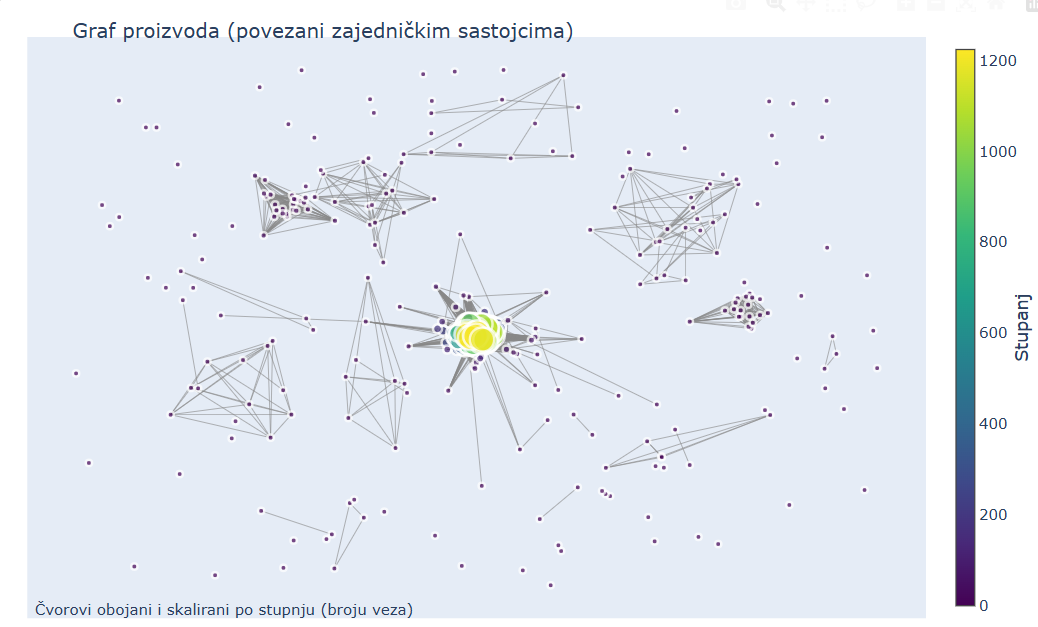

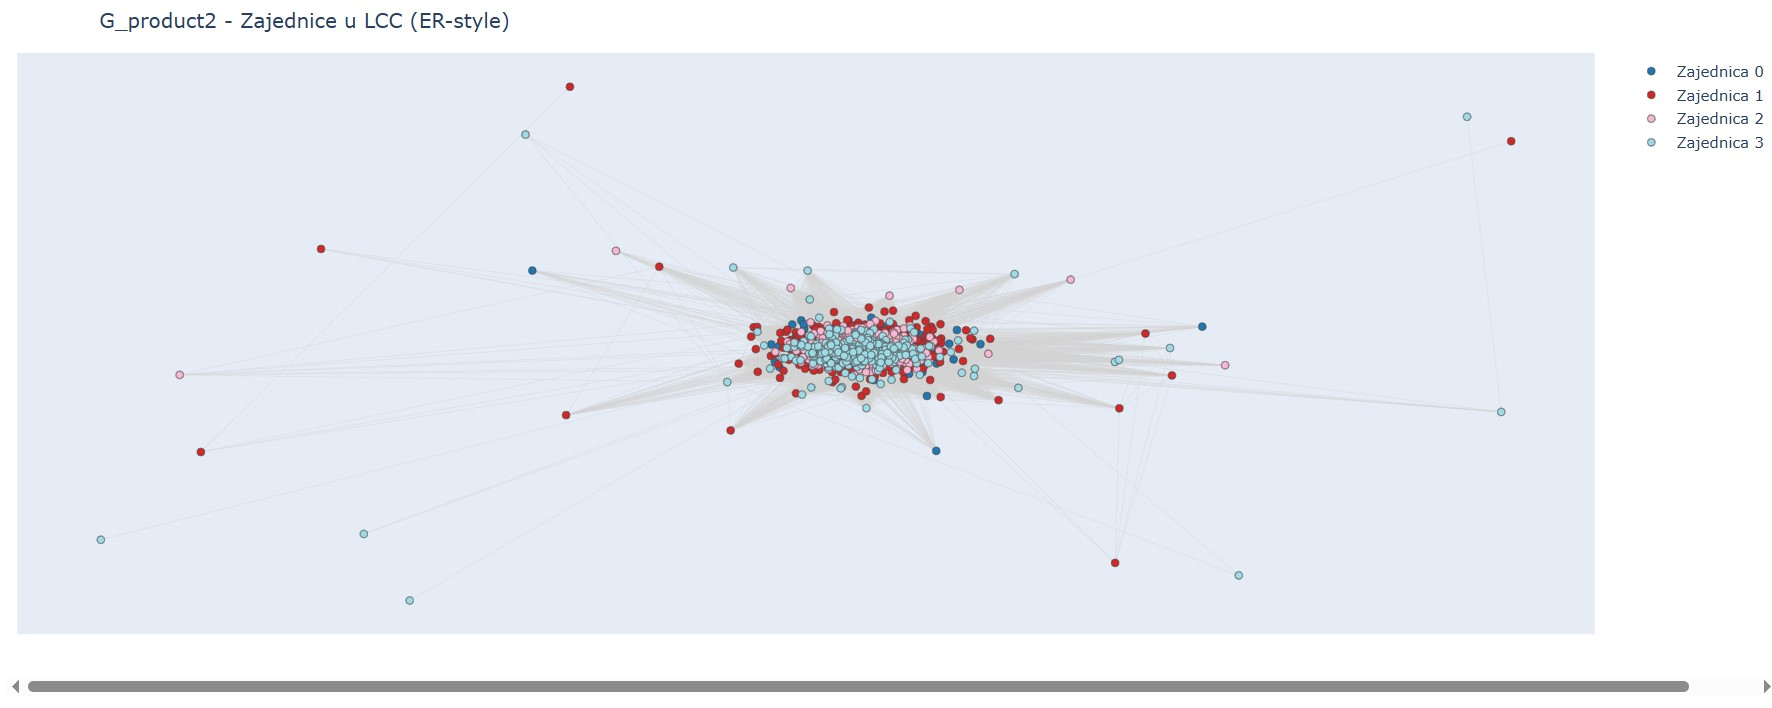

*   **Analiza zajednica na temelju naziva proizvoda:**
    *   **Zajednica 0 (Broj proizvoda: 197):**
        *   Dominiraju **kreme** i **hidratantne kreme** ("Crème", "Moisturizer", "Cream").
        *   Ima i specifičnih tretmana poput maski ("Overnight Mask") i losiona ("Treatment Lotion").
        *   Zaključak: Ova zajednica uglavnom obuhvaća **hidratantne i regenerativne kreme te intenzivnije noćne tretmane.**
    *   **Zajednica 1 (Broj proizvoda: 470):**
        *   Vrlo raznolika zajednica. Uključuje **kreme** ("Whipped Cream", "Ultra Facial Cream", "Repair Cream", "Magic Cream").
        *   Sadrži **esencije** ("Facial Treatment Essence", "Antioxidant Essence") i **ulja** ("Sleeping Night Oil", "Cleansing Oil", "Rose Oil").
        *   Također su prisutni **serumi** ("Night Serum") i paketi više proizvoda ("The Littles").
        *   Zaključak: Ovo je **najveća i najraznovrsnija zajednica**, koja obuhvaća širok spektar proizvoda od hidratantnih krema i ulja do esencija i seruma. Možemo reći da predstavlja "opću" grupu proizvoda za svakodnevnu njegu.
    *   **Zajednica 2 (Broj proizvoda: 273):**
        *   Ističu se proizvodi s prefiksom "Your Skin But Better CC+" (CC kreme) i "Water" ("Water Cream", "Aqua Bomb", "Water Sleeping Mask", "Water Bank Moisture Cream").
        *   Prisutni su i **tonirane hidratantne kreme** ("Tinted Moisturizer") i **BB kreme** ("Premium Beauty Balm").
        *   Zaključak: Ova zajednica naginje prema **hidratantnim proizvodima na bazi vode i proizvodima za ujednačavanje tena** s dodatkom SPF-a (CC/BB kreme, tonirane kreme).
    *   **Zajednica 3 (Broj proizvoda: 315):**
        *   Uključuje razne **kreme** ("Moisturizing Soft Cream", "Moisturizing Lotion+", "Moisturizing Gel", "Energy-Boosting Gel Moisturizer").
        *   Prisutna su **ulja** ("Renewal Oil", "Rose Oil").
        *   Sadrži **hidratantne tretmane** ("Moisture Surge", "Micro Essence") i **proizvode za ujednačavanje tena/primere** ("BB Tinted Treatment", "Camera Ready BB Cream").
        *   Zaključak: Ova zajednica slična je Zajednici 1 i 2, s fokusom na **hidrataciju, ulja i proizvode za ujednačavanje tena**, ali s nešto drugačijom kombinacijom specifičnih naziva proizvoda.



In [48]:
'''import plotly.graph_objects as go
import networkx as nx

# 📊 Izračunaj stupanj svakog čvora
degrees = dict(G_product2.degree())

# 📌 Pozicije čvorova (za layout)
pos = nx.spring_layout(G_product2, seed=42)

# 🎨 Koordinati bridova
edge_x = []
edge_y = []
for edge in G_product2.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# 🎯 Koordinati i hover za čvorove
node_x = []
node_y = []
node_text = []
node_size = []
node_color = []

max_degree = max(degrees.values()) if degrees else 1

for node in G_product2.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    attr = G_product2.nodes[node]
    name = attr.get('label', f'Product_{node}')
    brand = attr.get('brand', 'N/A')
    price = attr.get('price', 'N/A')
    label = attr.get('label', 'N/A')  # možeš preimenovati ako treba

    hover_text = (
        f"Proizvod: {name}<br>"
        f"Brand: {brand}<br>"
        f"Cijena: {price}<br>"
        f"Kategorija: {label}<br>"
        f"Stupanj: {degrees.get(node, 0)}"
    )
    node_text.append(hover_text)

    node_size.append(5 + 15 * (degrees.get(node, 0) / max_degree))
    node_color.append(degrees.get(node, 0))

# ✏️ Trace za bridove
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# ✏️ Trace za čvorove
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='Viridis',
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Stupanj',
            xanchor='left',
            titleside='right'
        ),
        line_width=2
    )
)

# 📈 Kreiraj Plotly figuru
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='<br>Graf proizvoda (povezani zajedničkim sastojcima)',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[dict(
            text="Čvorovi obojani i skalirani po stupnju (broju veza)",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002
        )],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

# 🔍 Prikaz
fig.show()
'''

'import plotly.graph_objects as go\nimport networkx as nx\n\n# 📊 Izračunaj stupanj svakog čvora\ndegrees = dict(G_product2.degree())\n\n# 📌 Pozicije čvorova (za layout)\npos = nx.spring_layout(G_product2, seed=42)\n\n# 🎨 Koordinati bridova\nedge_x = []\nedge_y = []\nfor edge in G_product2.edges():\n    x0, y0 = pos[edge[0]]\n    x1, y1 = pos[edge[1]]\n    edge_x.extend([x0, x1, None])\n    edge_y.extend([y0, y1, None])\n\n# 🎯 Koordinati i hover za čvorove\nnode_x = []\nnode_y = []\nnode_text = []\nnode_size = []\nnode_color = []\n\nmax_degree = max(degrees.values()) if degrees else 1\n\nfor node in G_product2.nodes():\n    x, y = pos[node]\n    node_x.append(x)\n    node_y.append(y)\n\n    attr = G_product2.nodes[node]\n    name = attr.get(\'label\', f\'Product_{node}\')\n    brand = attr.get(\'brand\', \'N/A\')\n    price = attr.get(\'price\', \'N/A\')\n    label = attr.get(\'label\', \'N/A\')  # možeš preimenovati ako treba\n\n    hover_text = (\n        f"Proizvod: {name}<br>"\n    

In [ ]:
'''import networkx as nx
import plotly.graph_objects as go
from matplotlib import cm, colors as mcolors

# ➤ Dobij najveću povezanu komponentu iz G_product2
product2_lcc = max(nx.connected_components(G_product2), key=len)
G_product2_lcc = G_product2.subgraph(product2_lcc).copy()

print(f"Broj čvorova u najvećoj povezanoj komponenti grafa G_product2: {G_product2_lcc.number_of_nodes()}")

# ➤ Louvain detekcija zajednica
partition_product2_lcc, modularity_product2_lcc = run_louvain_multiple_times(G_product2_lcc, runs=20)

print(f"Modularnost zajednica u G_product2 LCC: {modularity_product2_lcc:.4f}")

# ➤ Grupiraj čvorove po zajednicama
communities_product2_lcc = {}
for node, comm_id in partition_product2_lcc.items():
    communities_product2_lcc.setdefault(comm_id, []).append(node)

print(f"Broj zajednica u G_product2 LCC: {len(communities_product2_lcc)}")

# ➤ ER-stil minimalistička vizualizacija sa zajednicama
def plot_G_product2_lcc_communities(G, partition, title="G_product2 - Zajednice u LCC (ER-style)"):
    pos = nx.spring_layout(G, seed=42, k=0.1)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        if edge[0] in pos and edge[1] in pos:
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.3, color='lightgrey'),
        hoverinfo='none',
        mode='lines',
        showlegend=False
    )

    # 🎨 Boje za zajednice
    num_communities = len(set(partition.values()))
    cmap = cm.get_cmap('tab20' if num_communities <= 20 else 'tab20c', num_communities)

    community_traces = []
    for comm_id, nodes in sorted(communities_product2_lcc.items()):
        node_x = []
        node_y = []
        node_text = []

        for node in nodes:
            if node in pos:
                x, y = pos[node]
                node_x.append(x)
                node_y.append(y)
                attr = G.nodes[node]
                label = attr.get('label', f'Product_{node}')
                brand = attr.get('brand', 'N/A')
                price = attr.get('price', 'N/A')
                hover_text = f"Proizvod: {label}<br>Brand: {brand}<br>Cijena: {price}"
                node_text.append(hover_text)

        color = mcolors.rgb2hex(cmap(comm_id % num_communities))
        trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers',
            hoverinfo='text',
            marker=dict(
                color=color,
                size=6,  # Manje točke
                line_width=0.5
            ),
            text=node_text,
            name=f'Zajednica {comm_id}'
        )
        community_traces.append(trace)

    fig = go.Figure(
        data=[edge_trace] + community_traces,
        layout=go.Layout(
            title=title,
            titlefont_size=16,
            showlegend=True,
            hovermode='closest',
            margin=dict(b=20, l=5, r=5, t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
        )
    )

    fig.show()

# 🔍 Prikaz
plot_G_product2_lcc_communities(G_product2_lcc, partition_product2_lcc)
'''

'import networkx as nx\nimport plotly.graph_objects as go\nfrom matplotlib import cm, colors as mcolors\n\n# ➤ Dobij najveću povezanu komponentu iz G_product2\nproduct2_lcc = max(nx.connected_components(G_product2), key=len)\nG_product2_lcc = G_product2.subgraph(product2_lcc).copy()\n\nprint(f"Broj čvorova u najvećoj povezanoj komponenti grafa G_product2: {G_product2_lcc.number_of_nodes()}")\n\n# ➤ Louvain detekcija zajednica\npartition_product2_lcc, modularity_product2_lcc = run_louvain_multiple_times(G_product2_lcc, runs=20)\n\nprint(f"Modularnost zajednica u G_product2 LCC: {modularity_product2_lcc:.4f}")\n\n# ➤ Grupiraj čvorove po zajednicama\ncommunities_product2_lcc = {}\nfor node, comm_id in partition_product2_lcc.items():\n    communities_product2_lcc.setdefault(comm_id, []).append(node)\n\nprint(f"Broj zajednica u G_product2 LCC: {len(communities_product2_lcc)}")\n\n# ➤ ER-stil minimalistička vizualizacija sa zajednicama\ndef plot_G_product2_lcc_communities(G, partition, title

In [ ]:
'''
print("\n--- Sastojci po zajednici u grafu sastojaka ---")
# Sortiraj zajednice po ID-u radi lakšeg pregleda
for comm_id in sorted(communities.keys()):
    nodes_in_community = communities[comm_id]
    # Filtriraj samo čvorove koji su sastojci u ovoj zajednici
    ingredient_nodes = [node for node in nodes_in_community if G_lcc.nodes[node].get('type') == 'ingredient']

    print(f"\nZajednica {comm_id} (Broj sastojaka: {len(ingredient_nodes)}):")
    # Ispis prvih 20 sastojaka radi preglednosti, ako ih ima više
    if len(ingredient_nodes) > 20:
        print(", ".join(ingredient_nodes[:20]) + ", ...")
    else:
        print(", ".join(ingredient_nodes))

print("\n--- Kraj ispisa sastojaka po zajednici ---")

print("\n--- Proizvodi po zajednici u grafu proizvoda (LCC) ---")
# Sortiraj zajednice po ID-u radi lakšeg pregleda
for comm_id in sorted(communities_product2_lcc.keys()):
    nodes_in_community = communities_product2_lcc[comm_id]
    print(f"\nZajednica {comm_id} (Broj proizvoda: {len(nodes_in_community)}):")
    # Ispis prvih 10 proizvoda radi preglednosti (koristeći 'label' atribut ako postoji)
    product_labels = [G_product2_lcc.nodes[node].get('label', f'Product_{node}') for node in nodes_in_community]
    if len(product_labels) > 10:
        print(", ".join(product_labels[:10]) + ", ...")
    else:
        print(", ".join(product_labels))

print("\n--- Kraj ispisa proizvoda po zajednici ---")
'''


--- Sastojci po zajednici u grafu sastojaka ---

Zajednica 0 (Broj sastojaka: 112):
Red 33, Rhus Succedanea Fruit Wax, Phe-noxyethanol, Oxidized Corn Oil, Polyglyceryl-6 Ximenia Americana Seedate, Brassica Campestris (Rapeseed) Seed Oil, Curcuma Longa Extract/Turmeric Root Extract, Acrylates/C10-30 Alykyl Acrylate Crosspolymer, Rosa Gallica Flower Extract, PEG-7 Caprylic/Capric Glycerides, PEG-240/HDI Copolymer Bis-Decyltetradecet-20 Ether, Rosa Rubiginosa (Rosehip) Seed Oil, Phaseolus Angularis Seed Extract, Carnosine, Stearoyl Inulin, Glucose Oxidase, Hydrolyzed Conchiolin Protein, Prunus Armeniaca Kernel Oil, Hydroxyethylcellu-lose, Di-C12-18 Alkyl Dimonium Chloride, ...

Zajednica 1 (Broj sastojaka: 117):
Phytic Acid, Olea Europaea (Olive) Seed Powder, Rosa Dama- scena Flower Water, Dioscorea Villosa (Wild Yam) Root Extract, Thymus Vulgaris Extract/Thyme Extract, Echinacea Angustifolia Extract, Spirulina Plantensis Powder, Gossypium Herbaceum (Cotton) Flower Extract, Betula Pendul

## Zaključak
U ovom projektu provedena je mrežna analiza kozmetičkih sastojaka s ciljem boljeg razumijevanja njihove povezanosti i funkcionalnih uloga unutar formulacija proizvoda. Korištenjem mrežnih metoda identificirani su ključni sastojci koji se najčešće pojavljuju u kombinacijama te oni koji imaju najvažniju poziciju unutar mreže.

Mrežna struktura otkrila je da kozmetički sastojci ne funkcioniraju izolirano, već se često grupiraju u funkcionalne cjeline, poput onih za hidrataciju, konzervaciju, teksturu ili antioksidativnu zaštitu. Primjenom algoritma za detekciju zajednica uspješno su prepoznate takve grupe, čime su otkrivene obrasci koji nisu lako vidljivi tradicionalnim metodama analize.
Analiza glavne komponente mreže pokazala je da je velika većina sastojaka međusobno povezana, što znači da se često koriste zajedno u proizvodima. To upućuje na to da formulacije nisu nasumične, već da proizvođači sastojke biraju prema određenim funkcionalnim ili tehnološkim kriterijima. Kad se mreža usporedila s nasumičnim grafom (ER modelom), pokazalo se da stvarna mreža ima kraće putanje i manju povezanost između nepovezanih čvorova, što dodatno potvrđuje da u formuliranju postoji određena „logika“ ili obrazac, a ne puko kombiniranje sastojaka.

Ova mrežna analiza ne samo da pomaže u boljem razumijevanju kako se sastojci kombiniraju, već postavlja temelje za buduće sustave preporuka u projektu te dublju analizu trendova u kozmetičkoj industriji.